In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_excel("/Users/yareshvijayasundaram/Downloads/compactiv.xlsx")

# 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [3]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [4]:
df.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[5 rows x 22 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [6]:
df.shape

(8192, 22)

In [7]:
#5 Point Summary:

In [8]:
df.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

In [9]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [10]:
#univariate 

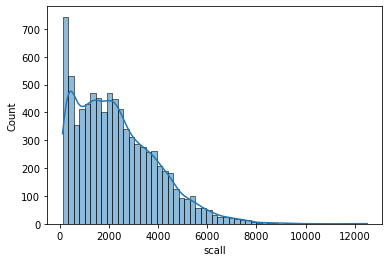

In [11]:
sns.histplot(data=df, x='scall', kde=True);

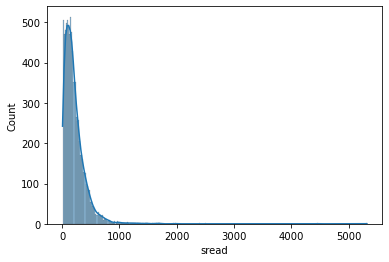

In [12]:
sns.histplot(data=df, x='sread', kde=True);

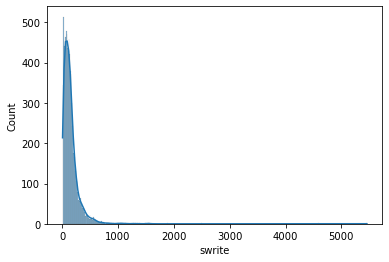

In [13]:
sns.histplot(data=df, x='swrite', kde=True);

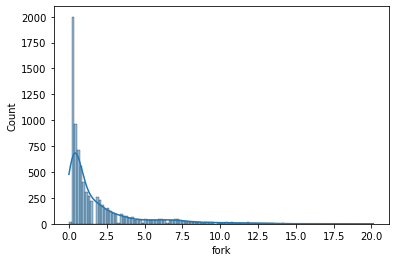

In [14]:
sns.histplot(data=df, x='fork', kde=True);

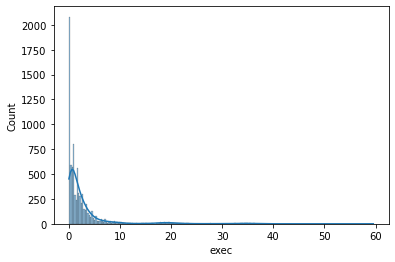

In [15]:
sns.histplot(data=df, x='exec', kde=True);

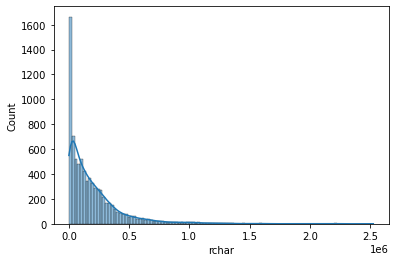

In [16]:
sns.histplot(data=df, x='rchar', kde=True);

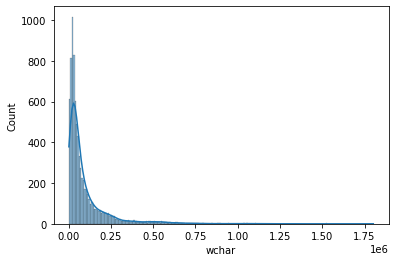

In [17]:
sns.histplot(data=df, x='wchar', kde=True);

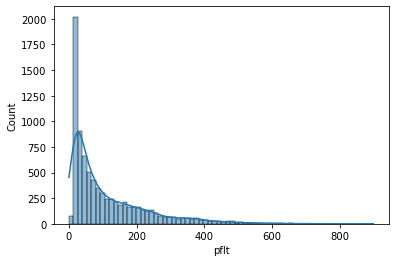

In [18]:
sns.histplot(data=df, x='pflt', kde=True);

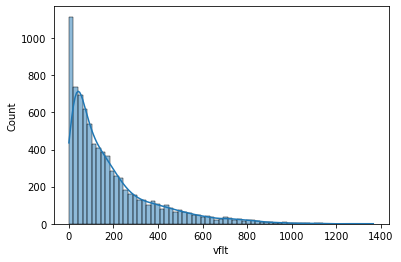

In [19]:
sns.histplot(data=df, x='vflt', kde=True);

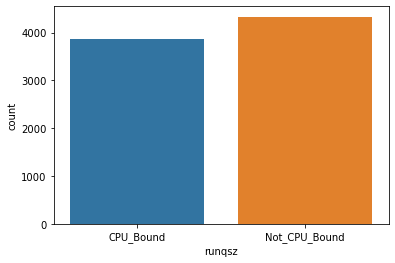

In [20]:
sns.countplot(data=df, x='runqsz');

In [21]:
df['runqsz'].value_counts()

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

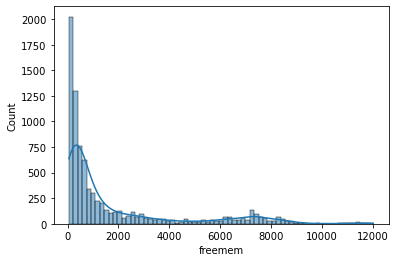

In [22]:
sns.histplot(data=df, x='freemem', kde=True);

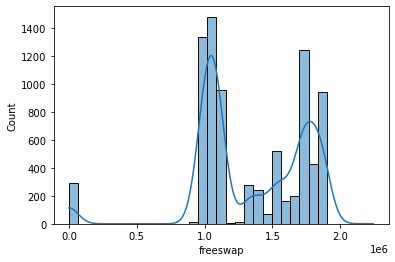

In [23]:
sns.histplot(data=df, x='freeswap', kde=True);

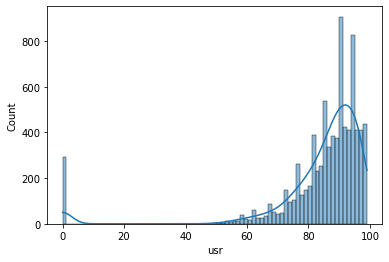

In [24]:
sns.histplot(data=df, x='usr', kde=True);

In [25]:
from pylab import rcParams

In [26]:
rcParams['figure.figsize'] = 40,20

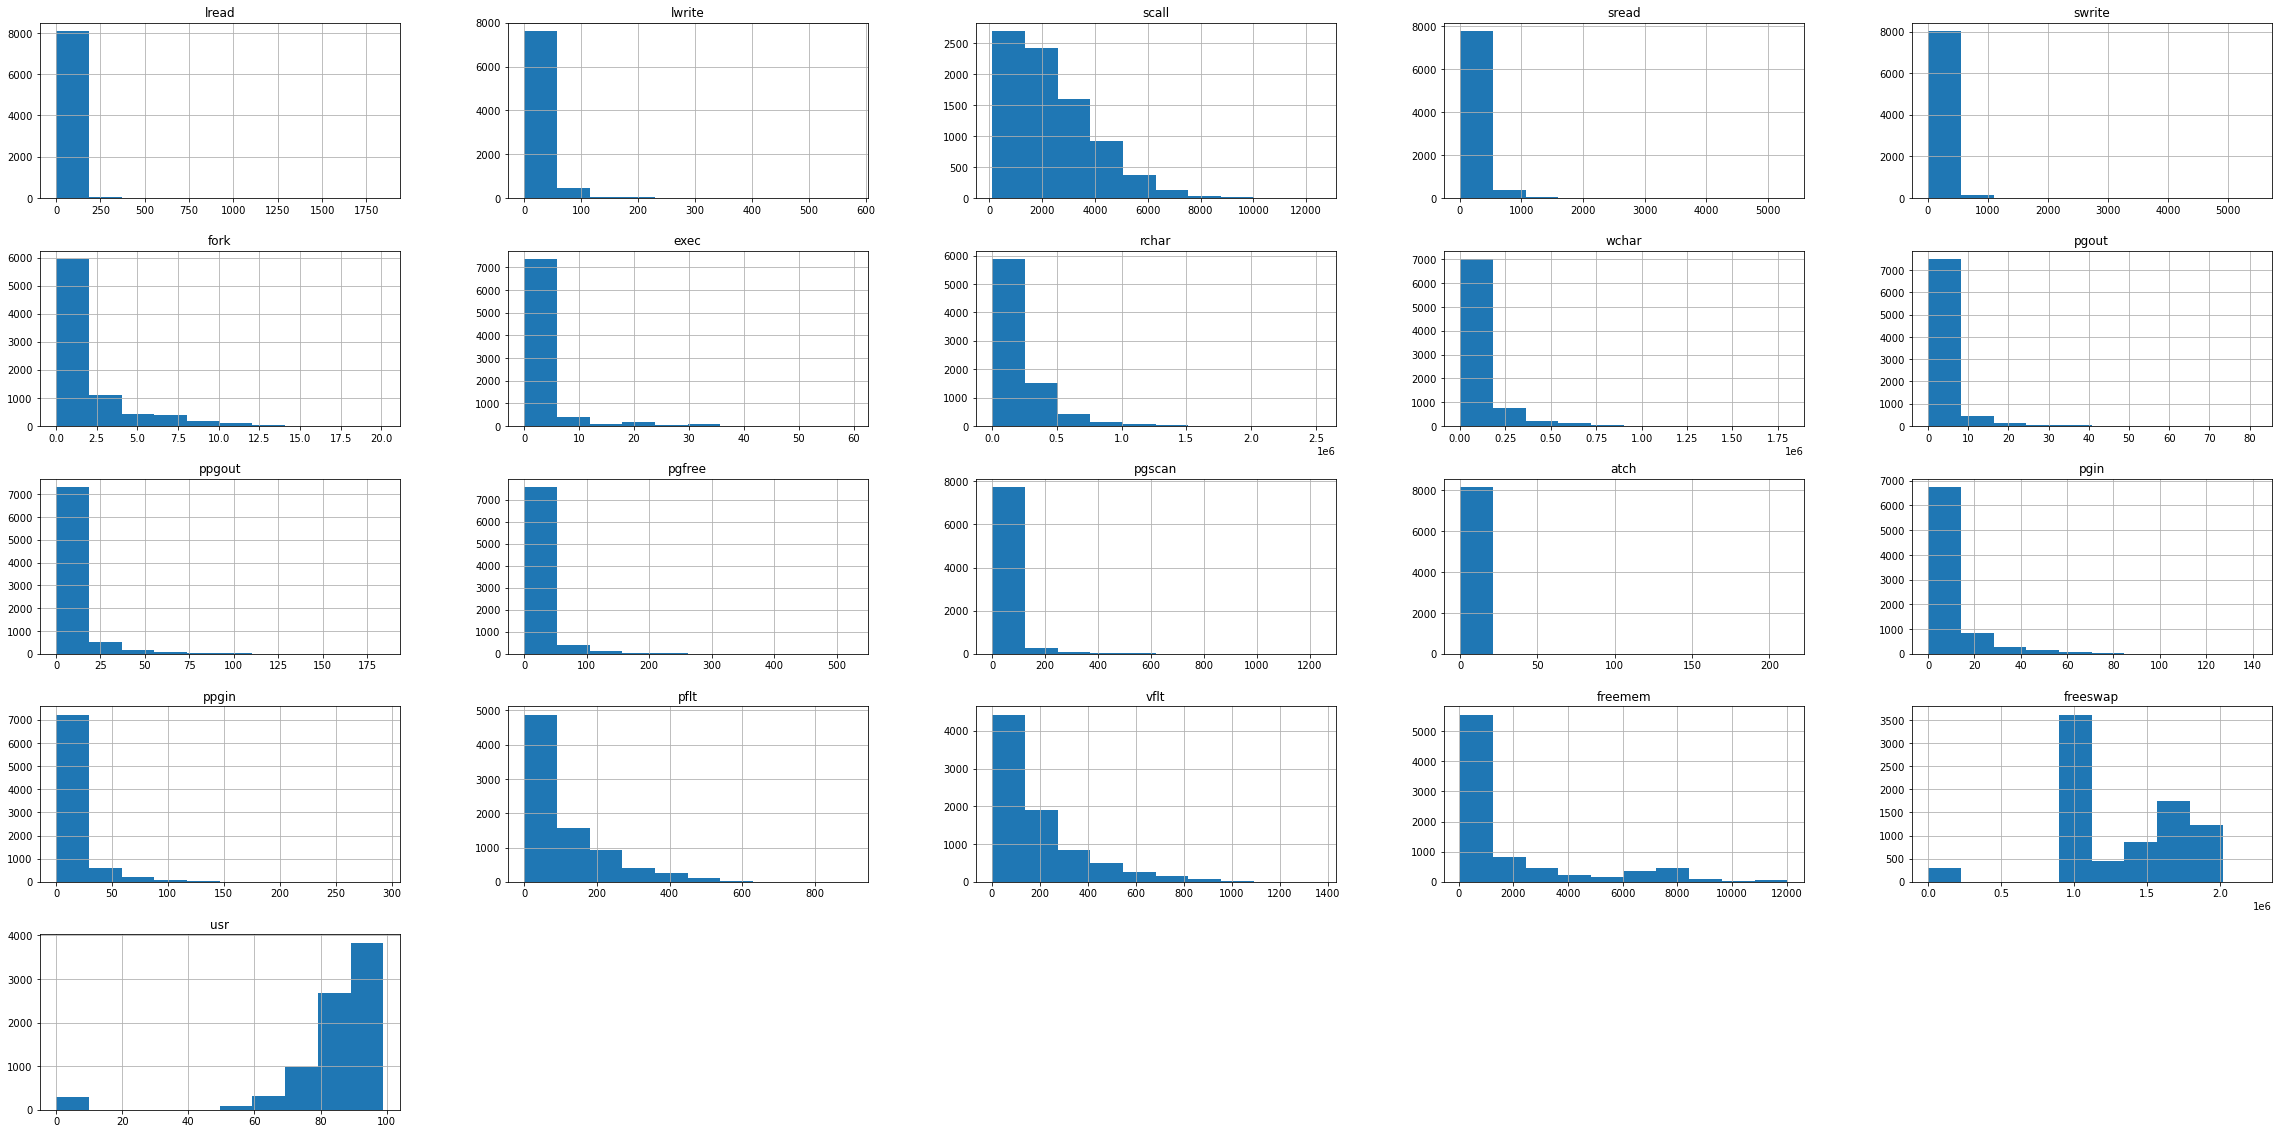

In [27]:

df[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr']].hist();

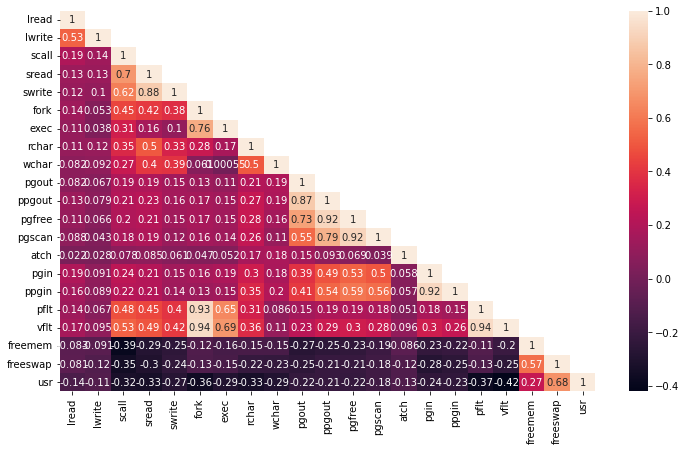

In [28]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));

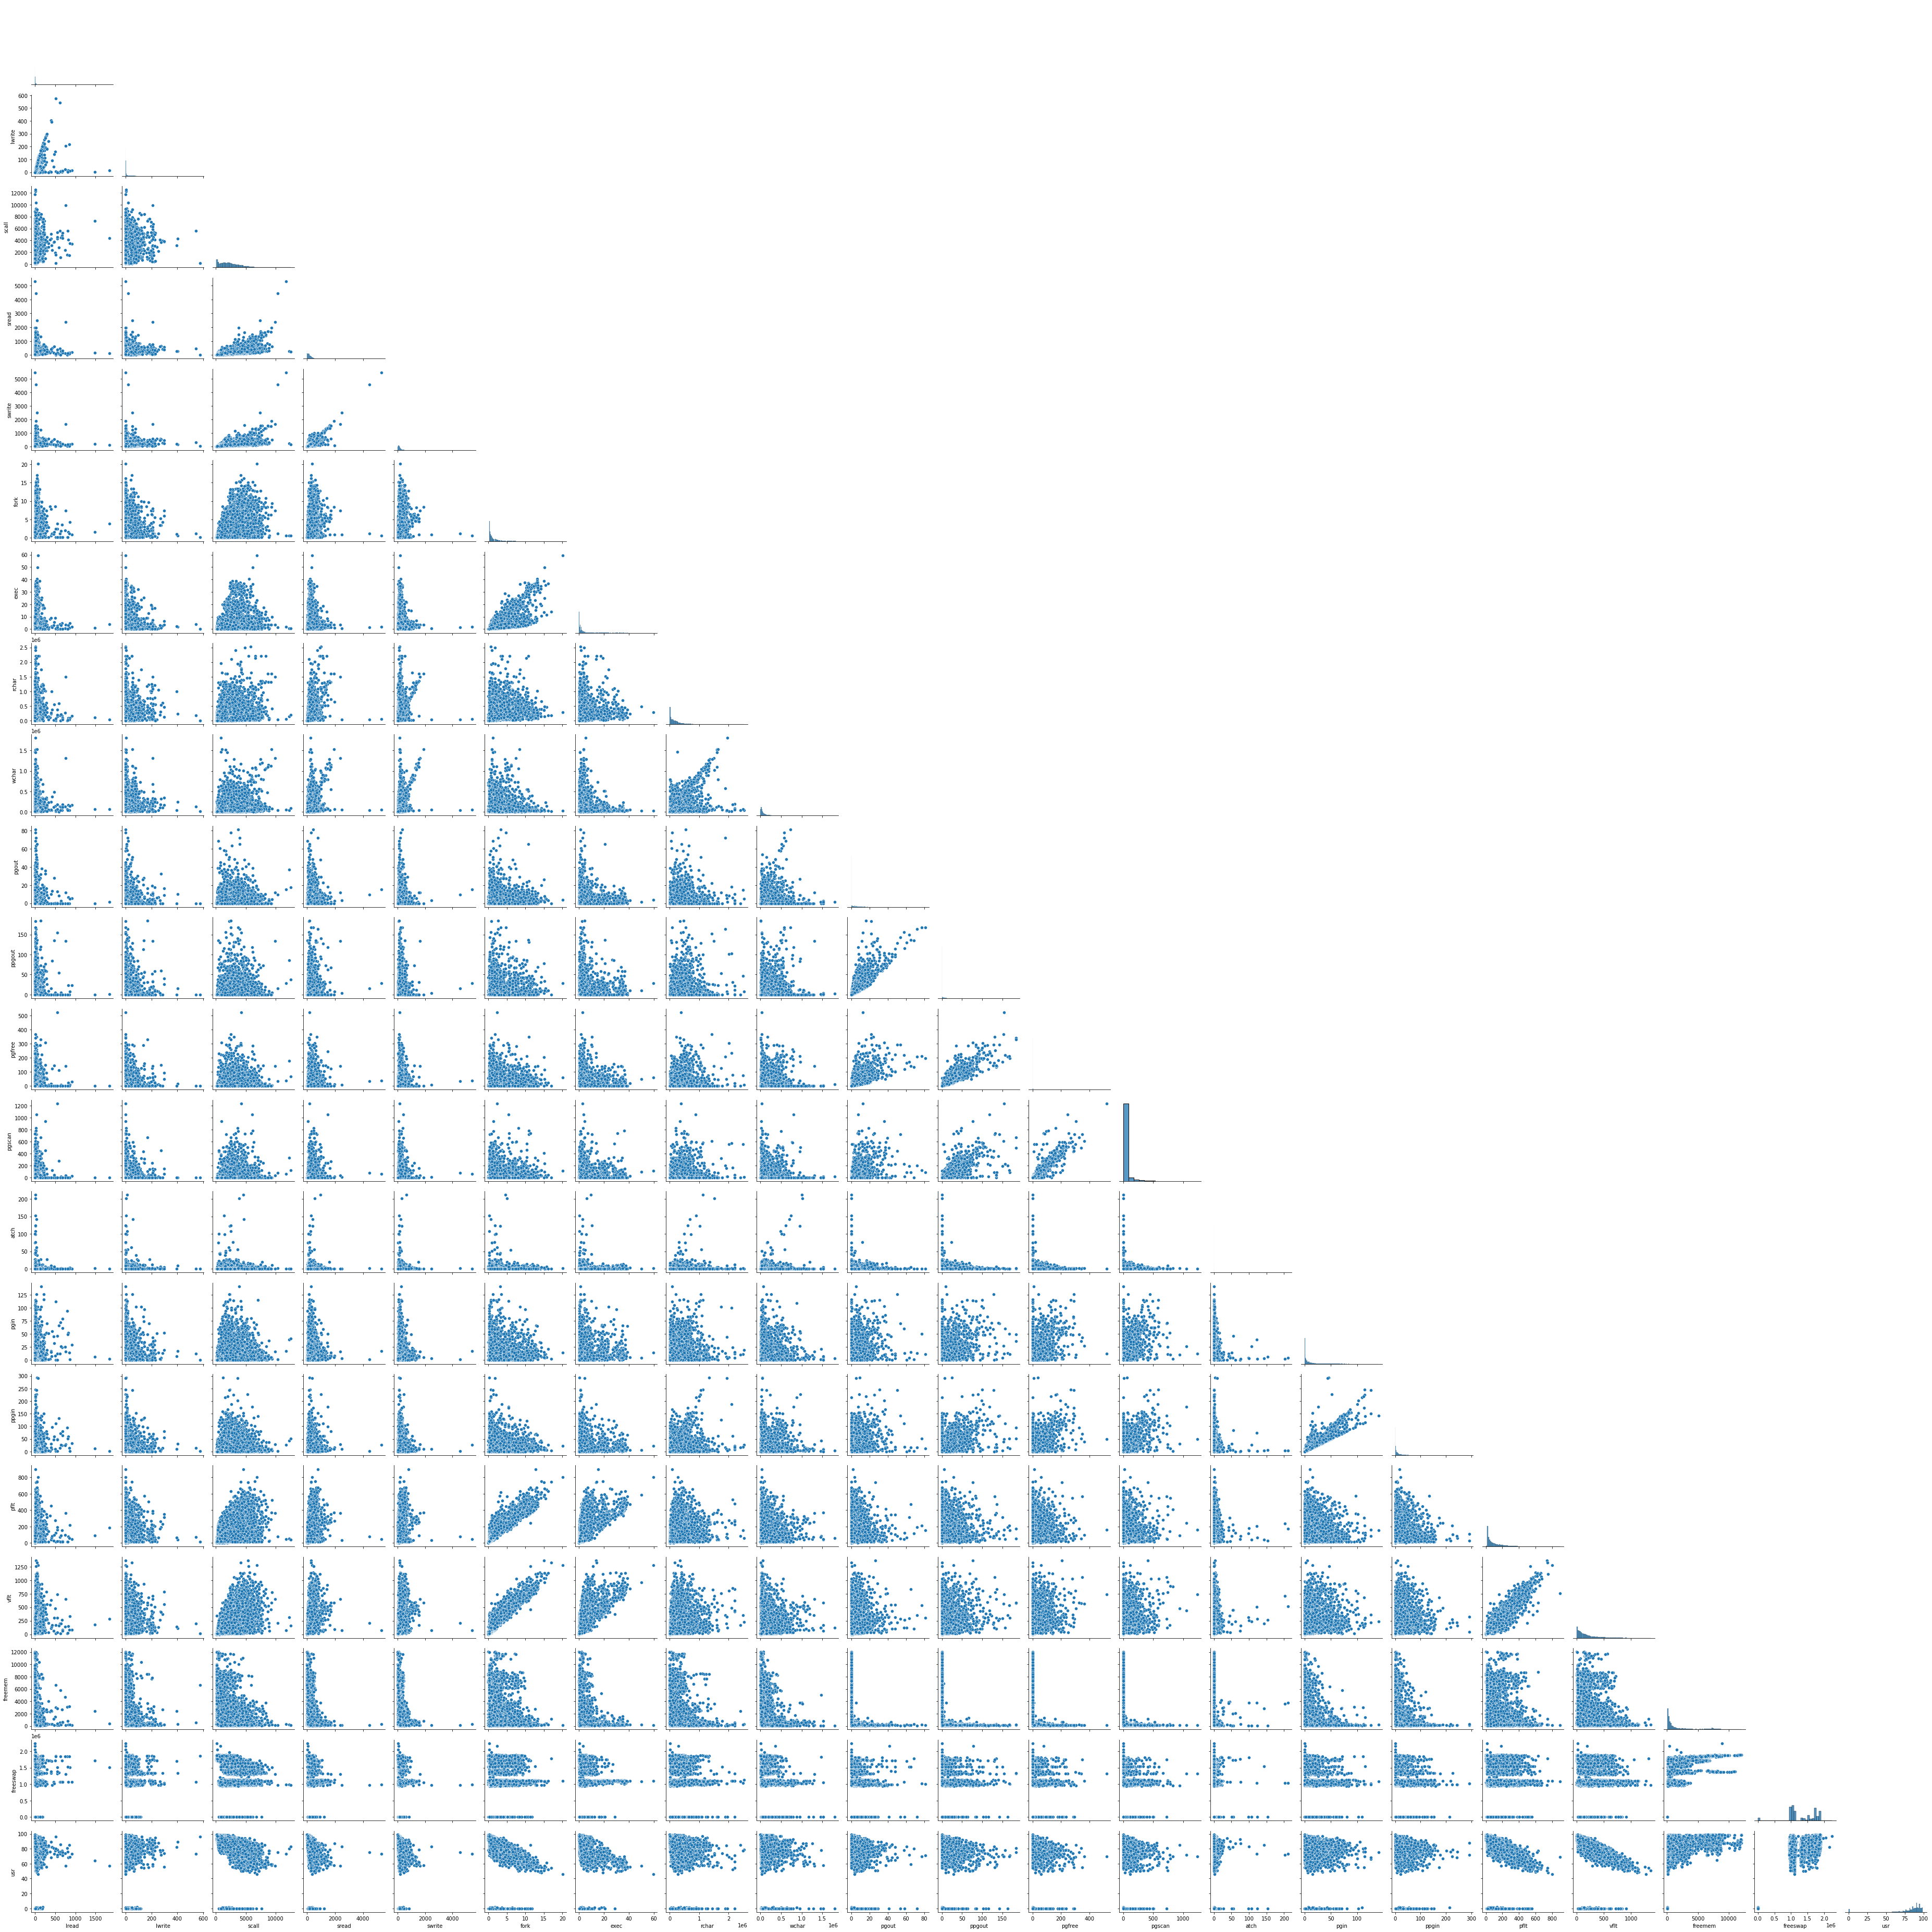

In [29]:
sns.pairplot(data=df[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr']],corner=True)

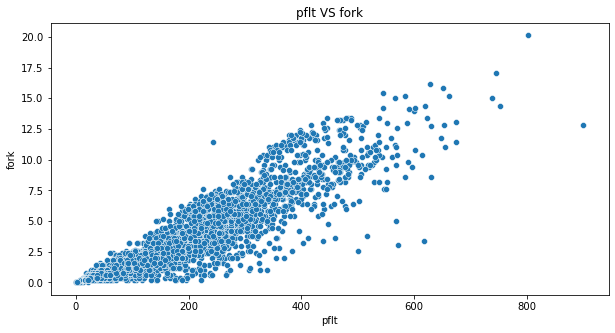

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='pflt', y='fork');
plt.title('pflt VS fork');

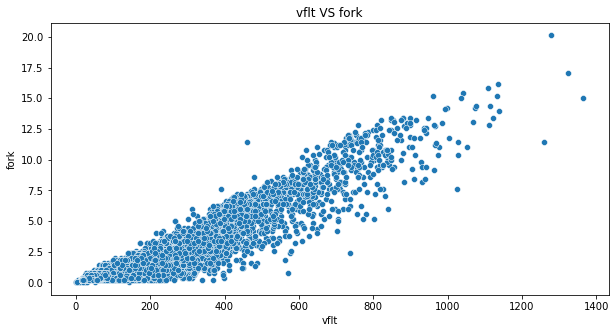

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='vflt', y='fork');
plt.title('vflt VS fork');

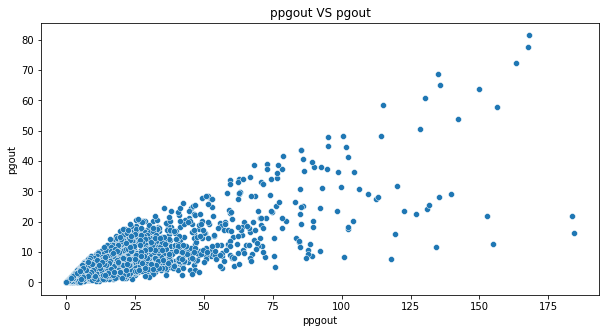

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='ppgout', y='pgout');
plt.title('ppgout VS pgout');

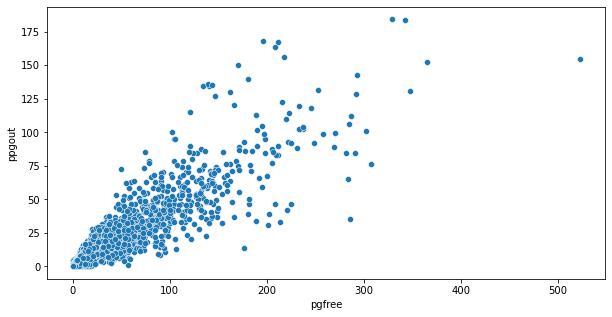

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='pgfree', y='ppgout');

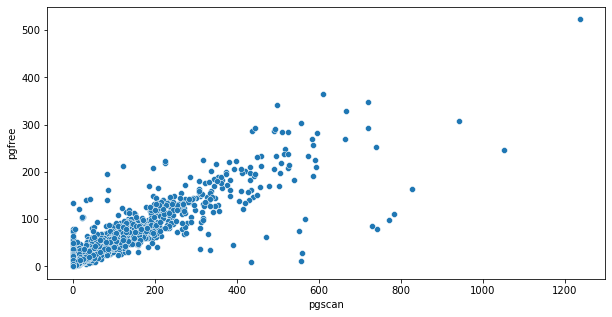

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='pgscan', y='pgfree');

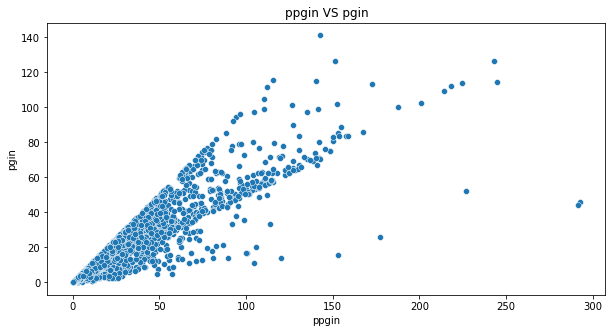

In [35]:

plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='ppgin', y='pgin');
plt.title('ppgin VS pgin');

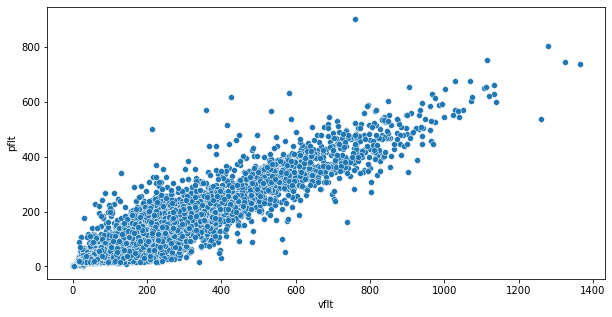

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='vflt', y='pflt');


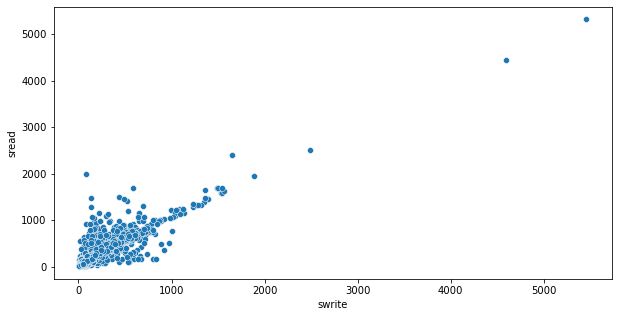

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='swrite', y='sread');

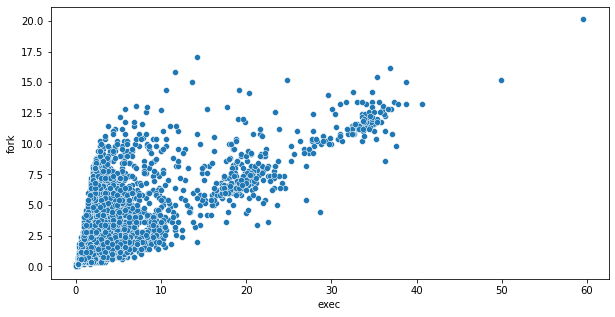

In [38]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='exec', y='fork');

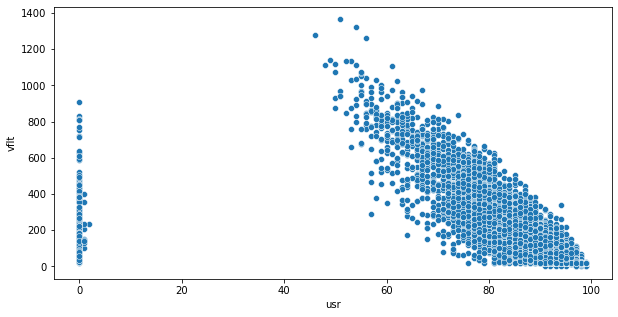

In [39]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='usr', y='vflt');

In [40]:
#muti-variate 

<Figure size 720x360 with 0 Axes>

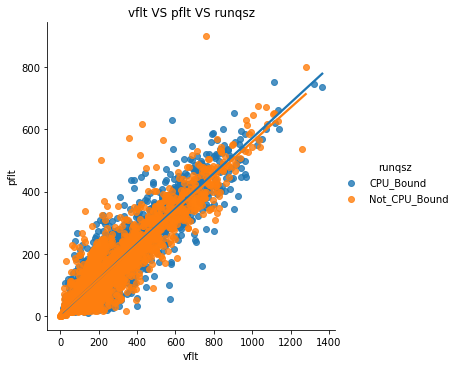

In [41]:
plt.figure(figsize=(10,5))
sns.lmplot(data=df, x='vflt', y='pflt', hue='runqsz',ci=False);
plt.title('vflt VS pflt VS runqsz');

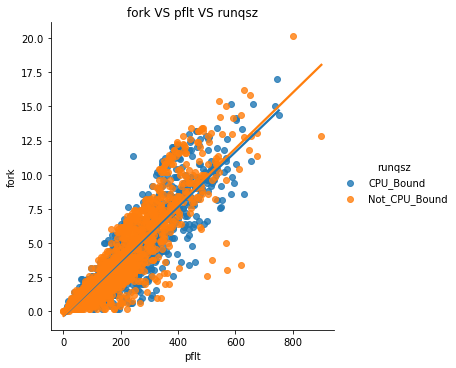

In [42]:
sns.lmplot(data=df, x='pflt', y='fork', hue='runqsz',ci=False);
plt.title('fork VS pflt VS runqsz');

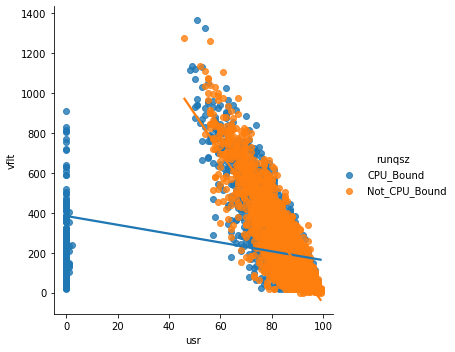

In [43]:
sns.lmplot(data=df, x='usr', y='vflt', hue='runqsz',ci=False);

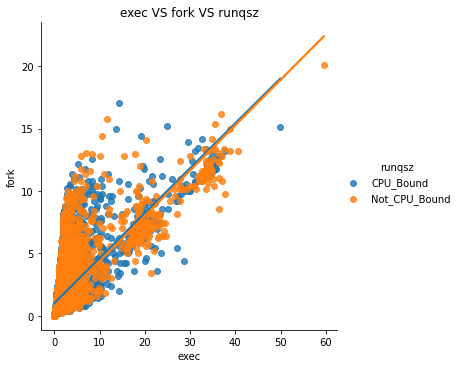

In [44]:
sns.lmplot(data=df, x='exec', y='fork', hue='runqsz',ci=False);
plt.title('exec VS fork VS runqsz');

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [45]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [46]:
df['rchar'].fillna(df['rchar'].median(), inplace=True)
df['wchar'].fillna(df['wchar'].median(), inplace=True)

In [47]:
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [48]:
for i in df.columns: 
    count= (df[i]==0.0).sum()
    print('Zero Values in',i, 'is', count)

Zero Values in lread is 675
Zero Values in lwrite is 2684
Zero Values in scall is 0
Zero Values in sread is 0
Zero Values in swrite is 0
Zero Values in fork is 21
Zero Values in exec is 21
Zero Values in rchar is 0
Zero Values in wchar is 0
Zero Values in pgout is 4878
Zero Values in ppgout is 4878
Zero Values in pgfree is 4869
Zero Values in pgscan is 6448
Zero Values in atch is 4575
Zero Values in pgin is 1220
Zero Values in ppgin is 1220
Zero Values in pflt is 3
Zero Values in vflt is 0
Zero Values in runqsz is 0
Zero Values in freemem is 0
Zero Values in freeswap is 0
Zero Values in usr is 283


In [49]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


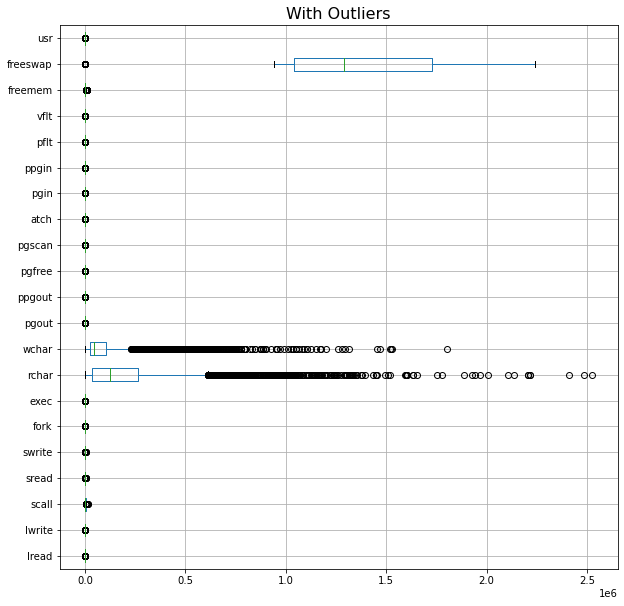

In [50]:
cont=df.dtypes[(df.dtypes!='object')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [51]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [52]:
for column in df[cont[:20]].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [53]:
cont

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr'],
      dtype='object')

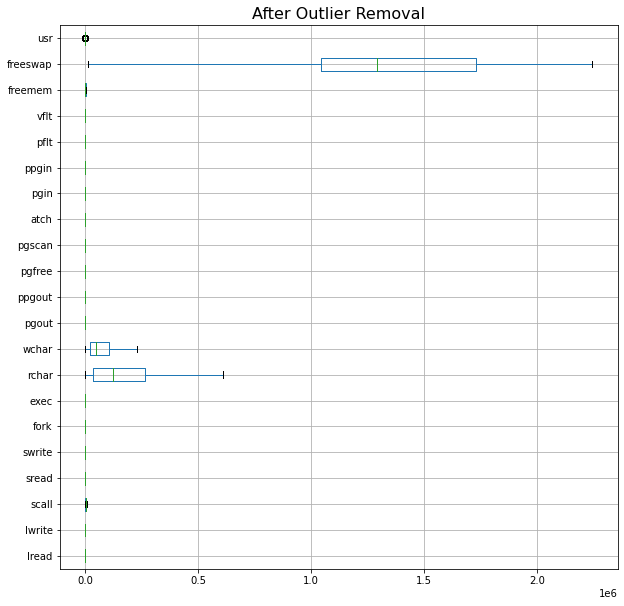

In [54]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

# 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [55]:
df = pd.get_dummies(df,columns=['runqsz'],drop_first=True)
df.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.0  53995.0    0.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.0   8385.0    0.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  125473.5  31950.0    0.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  125473.5   8670.0    0.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt   freemem   freeswap  usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40  4659.125  1730946.0   95   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  4659.125  1869002.0   97   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20   702.000  1021237.0   87   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  4659.125  1863704.0   98   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60   633.000  1760253.0   90   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 22 columns]

In [56]:
# Copy all the predictor variables into X dataframe
X = df.drop('usr',axis=1)
# Copy target into the y dataframe. 
y = df['usr']

In [57]:
X.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.0  53995.0    0.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.0   8385.0    0.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  125473.5  31950.0    0.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  125473.5   8670.0    0.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt   freemem  \
0  ...     0.0     0.0   0.0   1.6    2.6   16.00   26.40  4659.125   
1  ...     0.0     0.0   0.0   0.0    0.0   15.63   16.83  4659.125   
2  ...     0.0     0.0   1.2   6.0    9.4  150.20  220.20   702.000   
3  ...     0.0     0.0   0.0   0.2    0.2   15.60   16.80  4659.125   
4  ...     0.0     0.0   0.0   1.0    1.2   37.80   47.60   633.000   

    freeswap  runqsz_Not_CPU_Bound  
0  1730946.0                     0  
1  1869002.0                     1  
2  1021237.0                     1  
3  1863704.0                     1  
4  1760253.0                     1  

[5 rows x 21 columns]

In [58]:
y.head()

0    95
1    97
2    87
3    98
4    90
Name: usr, dtype: int64

In [59]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [61]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [62]:
regression_model.coef_

array([-7.50407342e-02,  3.96272361e-02,  1.09850268e-03,  9.83537305e-04,
       -5.36019999e-03, -9.02691705e-01, -5.36622098e-02, -1.03844533e-05,
       -6.73587019e-06, -7.15774178e-01, -1.77565517e-02,  1.04815614e-01,
        0.00000000e+00,  1.07931984e+00,  2.98665513e-01, -1.70358474e-01,
       -5.48093576e-02,  1.54599786e-02, -2.36153125e-03,  3.26572356e-05,
        7.01168416e+00])

In [63]:
list(enumerate(X_train.columns))

[(0, 'lread'),
 (1, 'lwrite'),
 (2, 'scall'),
 (3, 'sread'),
 (4, 'swrite'),
 (5, 'fork'),
 (6, 'exec'),
 (7, 'rchar'),
 (8, 'wchar'),
 (9, 'pgout'),
 (10, 'ppgout'),
 (11, 'pgfree'),
 (12, 'pgscan'),
 (13, 'atch'),
 (14, 'pgin'),
 (15, 'ppgin'),
 (16, 'pflt'),
 (17, 'vflt'),
 (18, 'freemem'),
 (19, 'freeswap'),
 (20, 'runqsz_Not_CPU_Bound')]

In [64]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for lread is -0.07504073422791643
The coefficient for lwrite is 0.03962723614635781
The coefficient for scall is 0.0010985026780728682
The coefficient for sread is 0.0009835373053474251
The coefficient for swrite is -0.00536019998511177
The coefficient for fork is -0.9026917050346785
The coefficient for exec is -0.05366220977150292
The coefficient for rchar is -1.0384453343370223e-05
The coefficient for wchar is -6.735870188054327e-06
The coefficient for pgout is -0.7157741777822665
The coefficient for ppgout is -0.01775655168781126
The coefficient for pgfree is 0.1048156143036473
The coefficient for pgscan is 0.0
The coefficient for atch is 1.0793198445095822
The coefficient for pgin is 0.29866551270177544
The coefficient for ppgin is -0.1703584737689542
The coefficient for pflt is -0.05480935758425474
The coefficient for vflt is 0.015459978615248702
The coefficient for freemem is -0.0023615312516139116
The coefficient for freeswap is 3.2657235608878066e-05
The coeffic

In [65]:
# Let us check the intercept for the model

intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 45.76001650301086


In [66]:
# R square on training data
regression_model.score(X_train,y_train)

0.6198709045647477

In [67]:
# R square on testing data
regression_model.score(X_test, y_test)

0.6110918220169601

In [68]:
#RMSE on Training data
predicted_train=regression_model.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

11.155491739897576

In [69]:
#RMSE on Testing data
predicted_test=regression_model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

11.906167025535279

In [70]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train,y_train],axis=1)
data_test = pd.concat([X_test,y_test],axis=1)

In [71]:
expr= ' usr ~ lread + lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout + ppgout + pgfree + pgscan + atch + pgin + ppgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [72]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula=expr,data=data_train).fit()
lm1.params

Intercept               4.576002e+01
lread                  -7.504073e-02
lwrite                  3.962724e-02
scall                   1.098503e-03
sread                   9.835373e-04
swrite                 -5.360200e-03
fork                   -9.026917e-01
exec                   -5.366221e-02
rchar                  -1.038445e-05
wchar                  -6.735870e-06
pgout                  -7.157742e-01
ppgout                 -1.775655e-02
pgfree                  1.048156e-01
pgscan                 -1.096526e-14
atch                    1.079320e+00
pgin                    2.986655e-01
ppgin                  -1.703585e-01
pflt                   -5.480936e-02
vflt                    1.545998e-02
freemem                -2.361531e-03
freeswap                3.265724e-05
runqsz_Not_CPU_Bound    7.011684e+00
dtype: float64

In [73]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:47:45   Log-Likelihood:                -21966.
No. Observations:                5734   AIC:                         4.397e+04
Df Residuals:                    5713   BIC:                         4.411e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               45.7600 

In [74]:
#Variance Inflation factor 

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])], index = X_train.columns)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

lread                    9.505097
lwrite                   6.548895
scall                    8.826652
sread                   18.181101
swrite                  16.779288
fork                    25.002626
exec                     6.092824
rchar                    4.345751
wchar                    3.341629
pgout                   16.004553
ppgout                  40.798798
pgfree                  22.973384
pgscan                        NaN
atch                     2.735390
pgin                    23.072154
ppgin                   23.163752
pflt                    24.685414
vflt                    33.875742
freemem                  3.406296
freeswap                 7.112881
runqsz_Not_CPU_Bound     2.155770
dtype: float64



/Users/yareshvijayasundaram/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [76]:
import statsmodels.api as sm

In [77]:
#Removing ppgout 
expr1= ' usr ~ lread + lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout + pgfree + pgscan + atch + pgin + ppgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [78]:
data_train1=data_train.drop(["ppgout"],axis=1)
olsmod_1=smf.ols(formula=expr1,data=data_train1)
olsres_1=olsmod_1.fit()
print(
    "R-squared:",
     np.round(olsres_1.rsquared,3),
    "\nAdjusted R-Squared:",
    np.round(olsres_1.rsquared_adj,3),)

R-squared: 0.62 
Adjusted R-Squared: 0.619


In [79]:
#Removing vflt
expr2= ' usr ~ lread + lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout + ppgout + pgfree + pgscan + atch + pgin + ppgin +pflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [80]:
data_train2=data_train.drop(["vflt"],axis=1)
olsmod_2=smf.ols(formula=expr2,data=data_train2)
olsres_2=olsmod_2.fit()
print(
    "R-squared:",
     np.round(olsres_2.rsquared,3),
    "\nAdjusted R-Squared:",
    np.round(olsres_2.rsquared_adj,3),)

R-squared: 0.619 
Adjusted R-Squared: 0.617


In [81]:
#Removing fork
expr3= ' usr ~ lread + lwrite + scall + sread + swrite + exec + rchar + wchar + pgout + ppgout + pgfree + pgscan + atch + pgin + ppgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [82]:
data_train3=data_train.drop(["fork"],axis=1)
olsmod_3=smf.ols(formula=expr3,data=data_train3)
olsres_3=olsmod_3.fit()
print(
    "R-squared:",
     np.round(olsres_3.rsquared,3),
    "\nAdjusted R-Squared:",
    np.round(olsres_3.rsquared_adj,3),)

R-squared: 0.619 
Adjusted R-Squared: 0.618


In [83]:
#Removing pflt
expr4= ' usr ~ lread + lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout + ppgout + pgfree + pgscan + atch + pgin + ppgin + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [84]:
data_train4=data_train.drop(["pflt"],axis=1)
olsmod_4=smf.ols(formula=expr4,data=data_train4)
olsres_4=olsmod_4.fit()
print(
    "R-squared:",
     np.round(olsres_4.rsquared,3),
    "\nAdjusted R-Squared:",
    np.round(olsres_4.rsquared_adj,3),)

R-squared: 0.612 
Adjusted R-Squared: 0.611


In [85]:
#Removing ppgin
expr5= ' usr ~ lread + lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout + ppgout + pgfree + pgscan + atch + pgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [86]:
data_train5=data_train.drop(["ppgin"],axis=1)
olsmod_5=smf.ols(formula=expr5,data=data_train5)
olsres_5=olsmod_5.fit()
print(
    "R-squared:",
     np.round(olsres_5.rsquared,3),
    "\nAdjusted R-Squared:",
    np.round(olsres_5.rsquared_adj,3),)

R-squared: 0.619 
Adjusted R-Squared: 0.618


In [87]:
#pgin
expr6= ' usr ~ lread + lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout + ppgout + pgfree + pgscan + atch + ppgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [88]:
data_train6=data_train.drop(["pgin"],axis=1)
olsmod_6=smf.ols(formula=expr6,data=data_train6)
olsres_6=olsmod_6.fit()
print(
    "R-squared:",
     np.round(olsres_6.rsquared,3),
    "\nAdjusted R-Squared:",
    np.round(olsres_6.rsquared_adj,3),)

R-squared: 0.619 
Adjusted R-Squared: 0.617


In [89]:
#removing pgfree
expr7= ' usr ~ lread + lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout + ppgout + pgscan + atch + pgin + ppgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [90]:
data_train7=data_train.drop(["pgfree"],axis=1)
olsmod_7=smf.ols(formula=expr7,data=data_train7)
olsres_7=olsmod_7.fit()
print(
    "R-squared:",
     np.round(olsres_7.rsquared,3),
    "\nAdjusted R-Squared:",
    np.round(olsres_7.rsquared_adj,3),)

R-squared: 0.62 
Adjusted R-Squared: 0.619


In [91]:
#Removing pgout
expr8= ' usr ~ lread + lwrite + scall + sread + swrite + fork + exec + rchar + wchar + ppgout + pgfree + pgscan + atch + pgin + ppgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [92]:
data_train8=data_train.drop(["pgout"],axis=1)
olsmod_8=smf.ols(formula=expr8,data=data_train8)
olsres_8=olsmod_8.fit()
print(
    "R-squared:",
     np.round(olsres_8.rsquared,3),
    "\nAdjusted R-Squared:",
    np.round(olsres_8.rsquared_adj,3),)

R-squared: 0.619 
Adjusted R-Squared: 0.618


In [93]:
#removing swrite 
expr9= ' usr ~ lread + lwrite + scall + sread + fork + exec + rchar + wchar + pgout + ppgout + pgfree + pgscan + atch + pgin + ppgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [94]:
data_train9=data_train.drop(["swrite"],axis=1)
olsmod_9=smf.ols(formula=expr9,data=data_train9)
olsres_9=olsmod_9.fit()
print(
    "R-squared:",
     np.round(olsres_9.rsquared,3),
    "\nAdjusted R-Squared:",
    np.round(olsres_9.rsquared_adj,3),)

R-squared: 0.62 
Adjusted R-Squared: 0.618


In [95]:
#Removing Sread
expr10= ' usr ~ lread + lwrite + scall + swrite + fork + exec + rchar + wchar + pgout + ppgout + pgfree + pgscan + atch + pgin + ppgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [96]:
data_train10=data_train.drop(["sread"],axis=1)
olsmod_10=smf.ols(formula=expr10,data=data_train10)
olsres_10=olsmod_10.fit()
print(
    "R-squared:",
     np.round(olsres_10.rsquared,3),
    "\nAdjusted R-Squared:",
    np.round(olsres_10.rsquared_adj,3),)

R-squared: 0.62 
Adjusted R-Squared: 0.619


In [97]:
#Removing lread
expr11= ' usr ~ lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout + ppgout + pgfree + pgscan + atch + pgin + ppgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [98]:
data_train11=data_train.drop(["lread"],axis=1)
olsmod_11=smf.ols(formula=expr11,data=data_train11)
olsres_11=olsmod_11.fit()
print(
    "R-squared:",
     np.round(olsres_11.rsquared,3),
    "\nAdjusted R-Squared:",
    np.round(olsres_11.rsquared_adj,3),)

R-squared: 0.619 
Adjusted R-Squared: 0.618


In [99]:
#Removing scall
expr12= ' usr ~ lread + lwrite  + sread + swrite + fork + exec + rchar + wchar + pgout + ppgout + pgfree + pgscan + atch + pgin + ppgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [100]:
data_train12=data_train.drop(["scall"],axis=1)
olsmod_12=smf.ols(formula=expr12,data=data_train12)
olsres_12=olsmod_12.fit()
print(
    "R-squared:",
     np.round(olsres_12.rsquared,3),
    "\nAdjusted R-Squared:",
    np.round(olsres_12.rsquared_adj,3),)

R-squared: 0.617 
Adjusted R-Squared: 0.615


In [101]:
#Removing freeswap 
expr13= ' usr ~ lread + lwrite + scall  + sread + swrite + fork + exec + rchar + wchar + pgout + ppgout + pgfree + pgscan + atch + pgin + ppgin +pflt + vflt + freemem + runqsz_Not_CPU_Bound'

In [102]:
data_train13=data_train.drop(["freeswap"],axis=1)
olsmod_13=smf.ols(formula=expr13,data=data_train13)
olsres_13=olsmod_13.fit()
print(
    "R-squared:",
     np.round(olsres_13.rsquared,3),
    "\nAdjusted R-Squared:",
    np.round(olsres_13.rsquared_adj,3),)

R-squared: 0.311 
Adjusted R-Squared: 0.309


In [103]:
#lread- R
expr14= ' usr ~ lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout + ppgout + pgfree + pgscan + atch + pgin + ppgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [104]:
data_train=data_train.drop(["lread"],axis=1)

In [105]:
lm2 = smf.ols(formula=expr14,data=data_train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     488.9
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:47:46   Log-Likelihood:                -21972.
No. Observations:                5734   AIC:                         4.398e+04
Df Residuals:                    5714   BIC:                         4.412e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               45.6447 

In [106]:
def calculate_vif(data_train):
    vif = pd.DataFrame()
    vif['Features'] = data_train.columns
    vif['VIF Values'] = [variance_inflation_factor(data_train.values, i) for i in range(data_train.shape[1])]
    return (vif)

In [107]:
features = data_train.iloc[:,:-1]
calculate_vif(features)

/Users/yareshvijayasundaram/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Features  VIF Values
0                 lwrite    1.564284
1                  scall    8.784036
2                  sread   18.153384
3                 swrite   16.766057
4                   fork   24.987178
5                   exec    6.060749
6                  rchar    4.345158
7                  wchar    3.338062
8                  pgout   16.000918
9                 ppgout   40.798632
10                pgfree   22.970849
11                pgscan         NaN
12                  atch    2.734487
13                  pgin   23.063315
14                 ppgin   23.034198
15                  pflt   24.613489
16                  vflt   33.760954
17               freemem    3.405487
18              freeswap    7.103061
19  runqsz_Not_CPU_Bound    2.138681

In [108]:
#lread, ppgout- R
expr15= ' usr ~ lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout + pgfree + pgscan + atch + pgin + ppgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [109]:
data_train=data_train.drop(["ppgout"],axis=1)

In [110]:
lm3 = smf.ols(formula=expr15,data=data_train).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     516.1
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:47:46   Log-Likelihood:                -21972.
No. Observations:                5734   AIC:                         4.398e+04
Df Residuals:                    5715   BIC:                         4.411e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               45.6519 

In [111]:
features = data_train.iloc[:,:-1]
calculate_vif(features)

/Users/yareshvijayasundaram/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Features  VIF Values
0                 lwrite    1.564068
1                  scall    8.783958
2                  sread   18.153366
3                 swrite   16.765843
4                   fork   24.981749
5                   exec    6.058752
6                  rchar    4.344989
7                  wchar    3.332985
8                  pgout    9.126489
9                 pgfree    8.629796
10                pgscan         NaN
11                  atch    2.733236
12                  pgin   23.007045
13                 ppgin   22.936373
14                  pflt   24.612686
15                  vflt   33.759456
16               freemem    3.400206
17              freeswap    7.087347
18  runqsz_Not_CPU_Bound    2.138359

In [112]:
#lread, ppgout, fork - R
expr16= ' usr ~ lwrite + scall + sread + swrite + exec + rchar + wchar + pgout + pgfree + pgscan + atch + pgin + ppgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [113]:
data_train=data_train.drop(["fork"],axis=1)

In [114]:
lm4 = smf.ols(formula=expr16,data=data_train).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     545.4
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:47:46   Log-Likelihood:                -21976.
No. Observations:                5734   AIC:                         4.399e+04
Df Residuals:                    5716   BIC:                         4.411e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               45.9171 

In [115]:
features = data_train.iloc[:,:-1]
calculate_vif(features)

/Users/yareshvijayasundaram/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Features  VIF Values
0                 lwrite    1.556167
1                  scall    8.610037
2                  sread   18.092692
3                 swrite   16.297934
4                   exec    5.588354
5                  rchar    4.343843
6                  wchar    3.331677
7                  pgout    9.126323
8                 pgfree    8.627294
9                 pgscan         NaN
10                  atch    2.720195
11                  pgin   22.961040
12                 ppgin   22.919447
13                  pflt   20.939969
14                  vflt   26.303421
15               freemem    3.399720
16              freeswap    7.082589
17  runqsz_Not_CPU_Bound    2.136403

In [116]:
#lread, ppgout, fork,sread - R
expr17= ' usr ~ lwrite + scall + swrite + exec + rchar + wchar + pgout + pgfree + pgscan + atch + pgin + ppgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [117]:
data_train=data_train.drop(["sread"],axis=1)

In [118]:
lm5 = smf.ols(formula=expr17,data=data_train).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     579.5
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:47:46   Log-Likelihood:                -21976.
No. Observations:                5734   AIC:                         4.399e+04
Df Residuals:                    5717   BIC:                         4.410e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               45.9405 

In [119]:
features = data_train.iloc[:,:-1]
calculate_vif(features)

/Users/yareshvijayasundaram/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Features  VIF Values
0                 lwrite    1.554461
1                  scall    7.799333
2                 swrite    9.184514
3                   exec    5.566845
4                  rchar    3.500320
5                  wchar    3.311998
6                  pgout    9.124731
7                 pgfree    8.626990
8                 pgscan         NaN
9                   atch    2.718312
10                  pgin   22.959654
11                 ppgin   22.918164
12                  pflt   20.933145
13                  vflt   26.181175
14               freemem    3.399255
15              freeswap    7.050035
16  runqsz_Not_CPU_Bound    2.135769

In [120]:
#lread, ppgout, fork,sread, pgfree - R
expr18= ' usr ~ lwrite + scall + swrite + exec + rchar + wchar + pgout + pgscan + atch + pgin + ppgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [121]:
data_train=data_train.drop(["pgfree"],axis=1)

In [122]:
lm6 = smf.ols(formula=expr18,data=data_train).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     617.9
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:47:46   Log-Likelihood:                -21977.
No. Observations:                5734   AIC:                         4.399e+04
Df Residuals:                    5718   BIC:                         4.409e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               45.9416 

In [123]:
features = data_train.iloc[:,:-1]
calculate_vif(features)

/Users/yareshvijayasundaram/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Features  VIF Values
0                 lwrite    1.553437
1                  scall    7.790704
2                 swrite    9.183108
3                   exec    5.564156
4                  rchar    3.500317
5                  wchar    3.311849
6                  pgout    2.899919
7                 pgscan         NaN
8                   atch    2.716974
9                   pgin   22.899568
10                 ppgin   22.701019
11                  pflt   20.881441
12                  vflt   26.076564
13               freemem    3.378971
14              freeswap    7.029390
15  runqsz_Not_CPU_Bound    2.134968

In [124]:
#lread, ppgout, fork,sread, pgfree,pgin - R
expr19= ' usr ~ lwrite + scall + swrite + exec + rchar + wchar + pgout + pgscan + atch + ppgin +pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [125]:
data_train=data_train.drop(["pgin"],axis=1)

In [126]:
lm7 = smf.ols(formula=expr19,data=data_train).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     658.8
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:47:47   Log-Likelihood:                -21986.
No. Observations:                5734   AIC:                         4.400e+04
Df Residuals:                    5719   BIC:                         4.410e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               46.2153 

In [127]:
features = data_train.iloc[:,:-1]
calculate_vif(features)

/Users/yareshvijayasundaram/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Features  VIF Values
0                 lwrite    1.552988
1                  scall    7.777049
2                 swrite    9.182952
3                   exec    5.561383
4                  rchar    3.477722
5                  wchar    3.307949
6                  pgout    2.899776
7                 pgscan         NaN
8                   atch    2.716453
9                  ppgin    2.596836
10                  pflt   20.699718
11                  vflt   25.739354
12               freemem    3.378925
13              freeswap    7.029145
14  runqsz_Not_CPU_Bound    2.133733

In [128]:
#lread, ppgout, fork,sread, pgfree,pgin,vflt - R
expr20= ' usr ~ lwrite + scall + swrite + exec + rchar + wchar + pgout + pgscan + atch + ppgin +pflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [129]:
data_train=data_train.drop(["vflt"],axis=1)

In [130]:
lm8 = smf.ols(formula=expr20,data=data_train).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     706.7
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:47:47   Log-Likelihood:                -21993.
No. Observations:                5734   AIC:                         4.401e+04
Df Residuals:                    5720   BIC:                         4.411e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               46.4587 

In [131]:
features = data_train.iloc[:,:-1]
calculate_vif(features)

/Users/yareshvijayasundaram/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Features  VIF Values
0                 lwrite    1.548848
1                  scall    7.769240
2                 swrite    8.886709
3                   exec    5.301284
4                  rchar    3.433221
5                  wchar    3.243546
6                  pgout    2.891588
7                 pgscan         NaN
8                   atch    2.704005
9                  ppgin    2.379016
10                  pflt    6.651752
11               freemem    3.377637
12              freeswap    6.901227
13  runqsz_Not_CPU_Bound    2.130458

In [132]:
#lread, ppgout, fork,sread, pgfree,pgin,vflt + swrite - R
expr21= ' usr ~ lwrite + scall + exec + rchar + wchar + pgout + pgscan + atch + ppgin +pflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [133]:
data_train=data_train.drop(["swrite"],axis=1)

In [134]:
lm9 = smf.ols(formula=expr21,data=data_train).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     765.2
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:47:47   Log-Likelihood:                -21994.
No. Observations:                5734   AIC:                         4.401e+04
Df Residuals:                    5721   BIC:                         4.410e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               46.2632 

In [135]:
features = data_train.iloc[:,:-1]
calculate_vif(features)

/Users/yareshvijayasundaram/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Features  VIF Values
0                 lwrite    1.547027
1                  scall    4.624351
2                   exec    4.827719
3                  rchar    3.426993
4                  wchar    2.957566
5                  pgout    2.891443
6                 pgscan         NaN
7                   atch    2.704005
8                  ppgin    2.374736
9                   pflt    5.620649
10               freemem    3.330078
11              freeswap    6.826774
12  runqsz_Not_CPU_Bound    2.122703

In [136]:
'lwrite','sread','fork','ppgout','pgfree','pgscan','ppgin','vflt'

('lwrite', 'sread', 'fork', 'ppgout', 'pgfree', 'pgscan', 'ppgin', 'vflt')

In [137]:
#lread, ppgout, fork,sread, pgfree,pgin,vflt + swrite + exec - R
expr22= ' usr ~ lwrite + scall + rchar + wchar + pgout + pgscan + atch + ppgin +pflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [138]:
data_train=data_train.drop(["exec"],axis=1)

In [139]:
lm10 = smf.ols(formula=expr22,data=data_train).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     834.9
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:47:47   Log-Likelihood:                -21994.
No. Observations:                5734   AIC:                         4.401e+04
Df Residuals:                    5722   BIC:                         4.409e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               46.2570 

In [140]:
features = data_train.iloc[:,:-1]
calculate_vif(features)

/Users/yareshvijayasundaram/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Features  VIF Values
0                 lwrite    1.543487
1                  scall    4.593703
2                  rchar    3.426992
3                  wchar    2.957139
4                  pgout    2.891116
5                 pgscan         NaN
6                   atch    2.690199
7                  ppgin    2.346590
8                   pflt    3.019915
9                freemem    3.327487
10              freeswap    6.822916
11  runqsz_Not_CPU_Bound    2.122601

In [141]:
#lread, ppgout, fork,sread, pgfree,pgin,vflt + swrite + exec + pgscan - R
expr23= ' usr ~ lwrite + scall + rchar + wchar + pgout  + atch + ppgin +pflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [142]:
data_train=data_train.drop(["pgscan"],axis=1)

In [143]:
lm11 = smf.ols(formula=expr23,data=data_train).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     834.9
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:47:47   Log-Likelihood:                -21994.
No. Observations:                5734   AIC:                         4.401e+04
Df Residuals:                    5722   BIC:                         4.409e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               46.2570 

In [144]:
features = data_train.iloc[:,:-1]
calculate_vif(features)

Features  VIF Values
0                 lwrite    1.543487
1                  scall    4.593703
2                  rchar    3.426992
3                  wchar    2.957139
4                  pgout    2.891116
5                   atch    2.690199
6                  ppgin    2.346590
7                   pflt    3.019915
8                freemem    3.327487
9               freeswap    6.822916
10  runqsz_Not_CPU_Bound    2.122601

In [145]:
lm11.params

Intercept               46.257005
lwrite                  -0.053743
scall                    0.001028
rchar                   -0.000010
wchar                   -0.000009
pgout                   -0.522183
atch                     1.217636
ppgin                    0.042121
pflt                    -0.050604
freemem                 -0.002333
freeswap                 0.000032
runqsz_Not_CPU_Bound     7.097783
dtype: float64

In [146]:
#lread, ppgout, fork,sread, pgfree,pgin,vflt + swrite + exec + pgscan - R+ freemem 
expr24= ' usr ~ lwrite + scall + rchar + wchar + pgout  + atch + ppgin +pflt + freeswap + runqsz_Not_CPU_Bound'

In [147]:
data_train=data_train.drop(["freemem"],axis=1)

In [148]:
lm12 = smf.ols(formula=expr24,data=data_train).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     836.0
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:47:47   Log-Likelihood:                -22158.
No. Observations:                5734   AIC:                         4.434e+04
Df Residuals:                    5723   BIC:                         4.441e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               47.7267 

In [149]:
lm12.params

Intercept               47.726695
lwrite                  -0.061242
scall                    0.001433
rchar                   -0.000012
wchar                   -0.000010
pgout                   -0.149956
atch                     2.048579
ppgin                    0.035589
pflt                    -0.052376
freeswap                 0.000028
runqsz_Not_CPU_Bound     6.549543
dtype: float64

In [150]:
features = data_train.iloc[:,:-1]
calculate_vif(features)

Features  VIF Values
0                lwrite    1.543410
1                 scall    4.340468
2                 rchar    3.409208
3                 wchar    2.956873
4                 pgout    2.758760
5                  atch    2.638406
6                 ppgin    2.346524
7                  pflt    3.009636
8              freeswap    3.666801
9  runqsz_Not_CPU_Bound    2.114543

In [151]:
#lread, ppgout, fork,sread, pgfree,pgin,vflt + swrite + exec + pgscan - R+ freemem + pgout
expr25= ' usr ~ lwrite + scall + rchar + wchar + atch + ppgin +pflt + freeswap + runqsz_Not_CPU_Bound'

In [152]:
data_train=data_train.drop(["pgout"],axis=1)

In [153]:
lm13 = smf.ols(formula=expr25,data=data_train).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     928.4
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:47:47   Log-Likelihood:                -22159.
No. Observations:                5734   AIC:                         4.434e+04
Df Residuals:                    5724   BIC:                         4.440e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               47.6655 

In [154]:
features = data_train.iloc[:,:-1]
calculate_vif(features)

Features  VIF Values
0                lwrite    1.541611
1                 scall    4.320816
2                 rchar    3.401634
3                 wchar    2.933241
4                  atch    1.818496
5                 ppgin    2.168239
6                  pflt    3.003985
7              freeswap    3.632436
8  runqsz_Not_CPU_Bound    2.097806

In [155]:
#lread, ppgout, fork,sread, pgfree,pgin,vflt + swrite + exec + pgscan - R+ freemem + pgout + ppgin
expr26= ' usr ~ lwrite + scall + rchar + wchar + atch +pflt + freeswap + runqsz_Not_CPU_Bound'

In [156]:
data_train=data_train.drop(["ppgin"],axis=1)

In [157]:
lm14 = smf.ols(formula=expr26,data=data_train).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1044.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:47:47   Log-Likelihood:                -22161.
No. Observations:                5734   AIC:                         4.434e+04
Df Residuals:                    5725   BIC:                         4.440e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               47.9263 

In [158]:
features = data_train.iloc[:,:-1]
calculate_vif(features)

Features  VIF Values
0                lwrite    1.537376
1                 scall    4.224616
2                 rchar    3.233496
3                 wchar    2.915433
4                  atch    1.739683
5                  pflt    2.995961
6              freeswap    3.616871
7  runqsz_Not_CPU_Bound    2.076059

In [159]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = lm14.fittedvalues.values  # predicted values
df_pred["Residuals"] = lm14.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
0             91      85.089384   5.910616
1             94      83.921711  10.078289
2              0      49.608022 -49.608022
3             83      73.028155   9.971845
4             94     103.092234  -9.092234

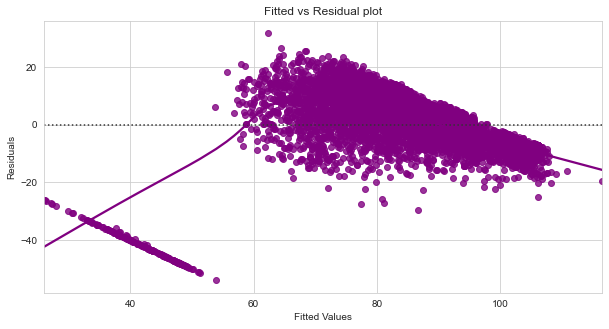

In [160]:
# let us plot the fitted values vs residuals
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [161]:
data_train.columns

Index(['lwrite', 'scall', 'rchar', 'wchar', 'atch', 'pflt', 'freeswap',
       'runqsz_Not_CPU_Bound', 'usr'],
      dtype='object')

<Figure size 720x360 with 0 Axes>

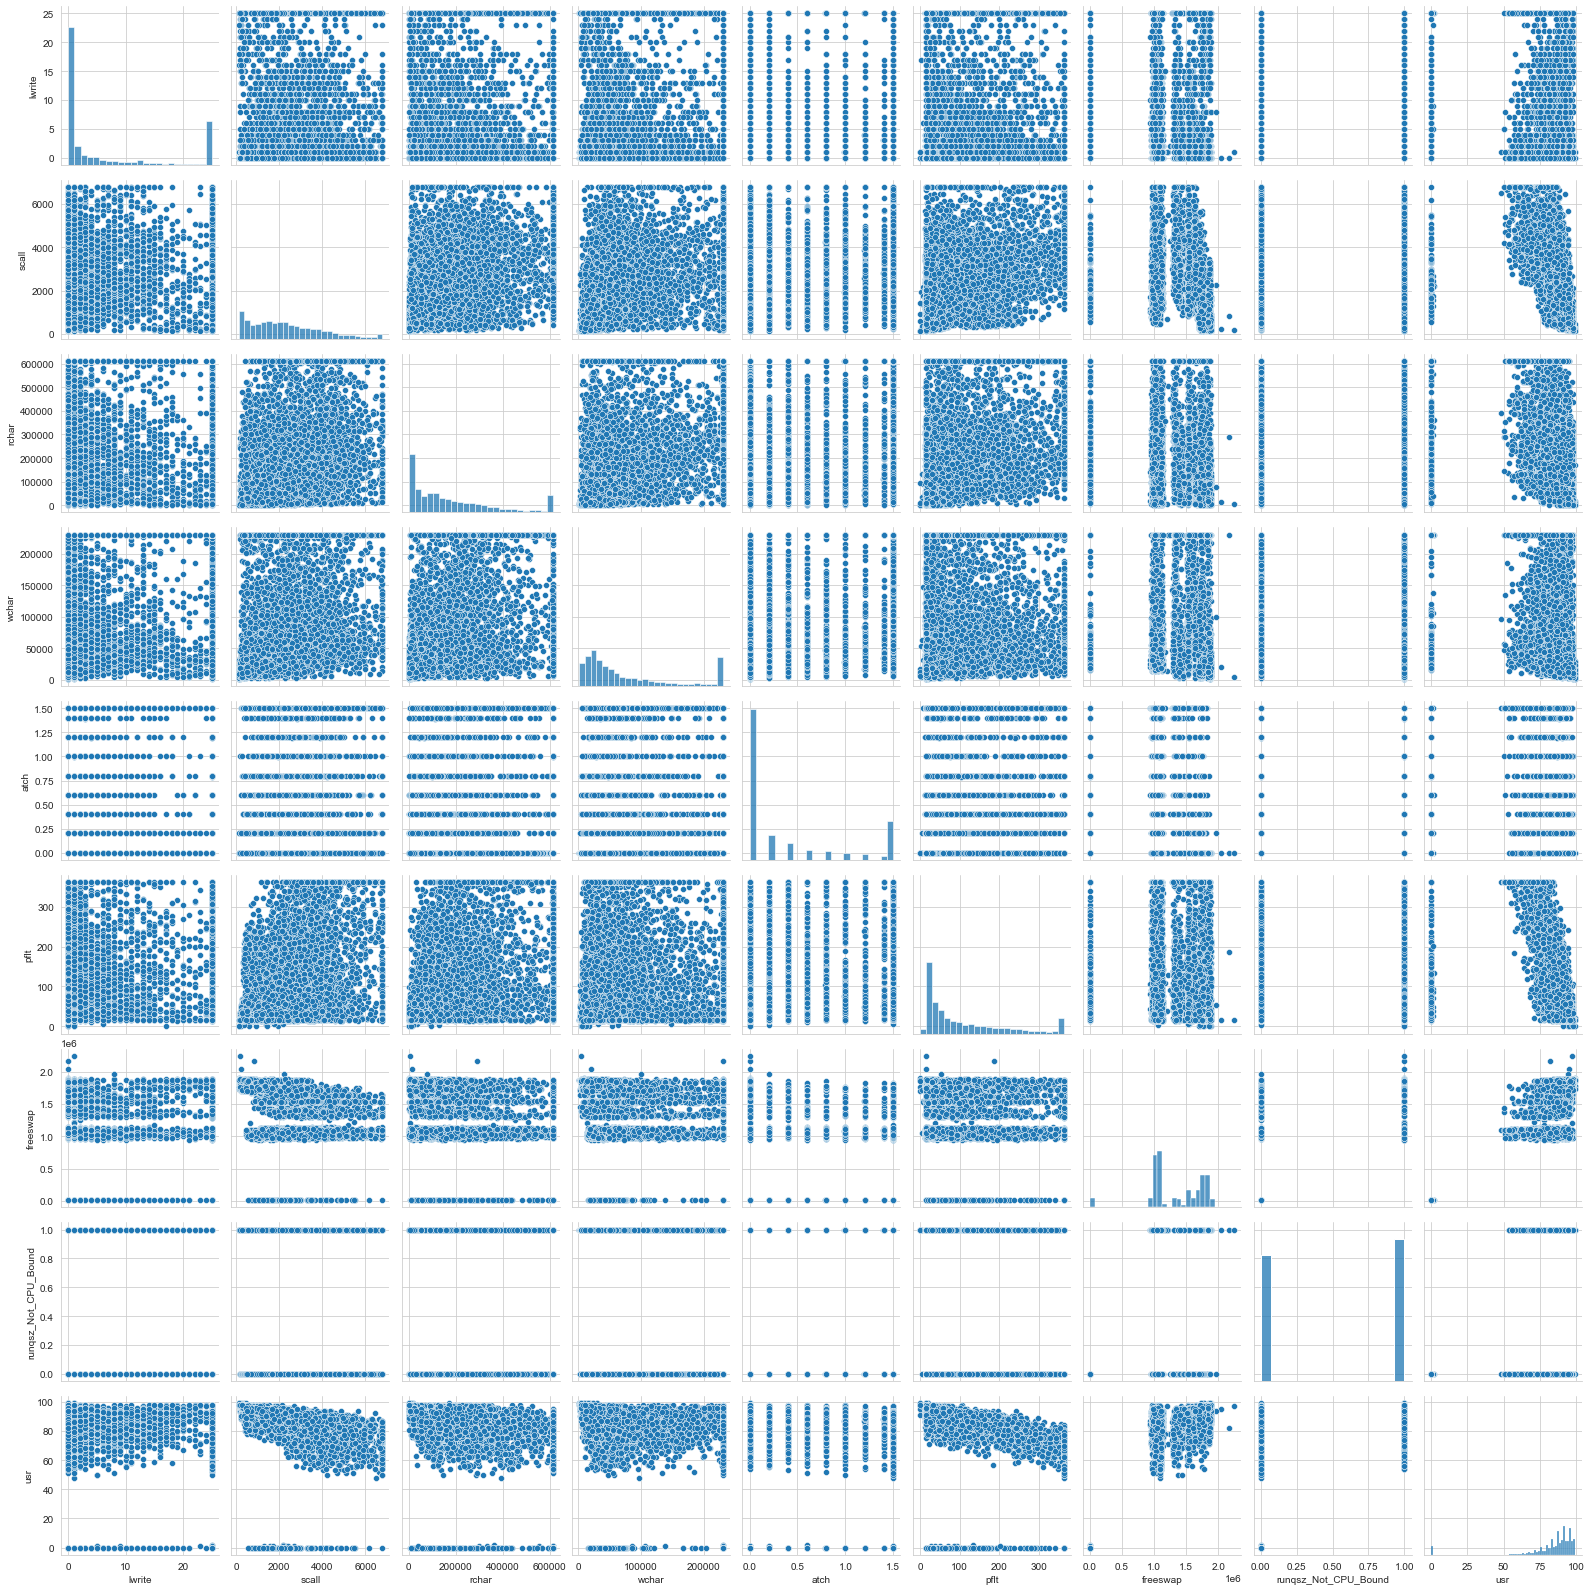

In [162]:
plt.figure(figsize=(10,5))
sns.pairplot(data=data_train[['lwrite', 'scall', 'rchar', 'wchar', 'atch', 'pflt', 'freeswap',
       'runqsz_Not_CPU_Bound', 'usr']])
plt.show()

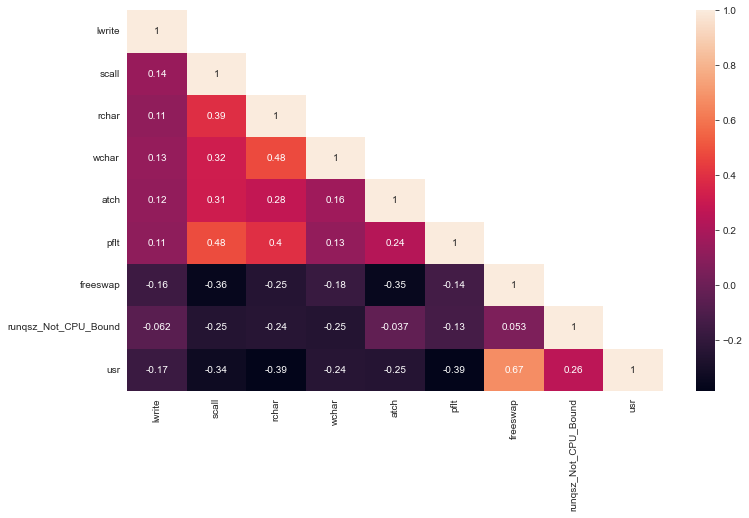

In [163]:
plt.figure(figsize=(12,7))
sns.heatmap(data_train.corr(), annot=True,mask=np.triu(data_train.corr(),+1));

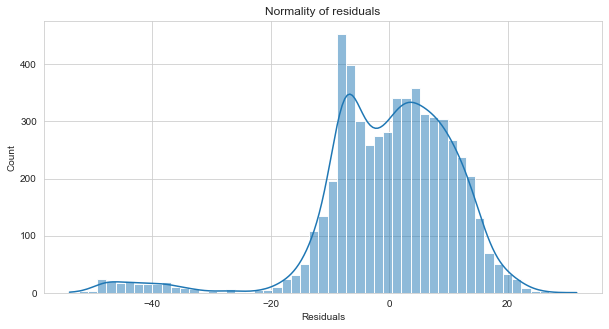

In [164]:
plt.figure(figsize=(10,5))
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

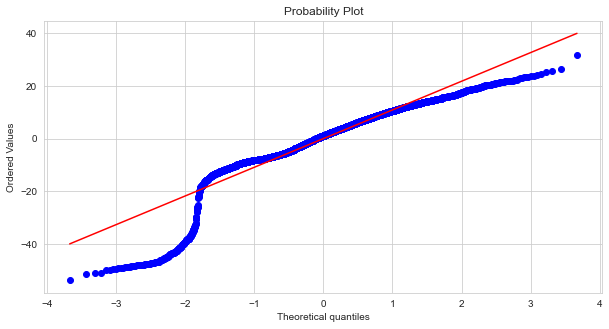

In [165]:
import pylab
import scipy.stats as stats
plt.figure(figsize=(10,5))

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [166]:
stats.shapiro(df_pred["Residuals"])

/Users/yareshvijayasundaram/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8922290205955505, pvalue=0.0)

In [167]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [168]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], data_train)
lzip(name, test)

[('F statistic', 1.2147288240220193), ('p-value', 1.0234657042646779e-07)]

In [169]:
for i,j in np.array(lm14.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(47.93) * Intercept + (-0.06) * lwrite + (0.0) * scall + (-0.0) * rchar + (-0.0) * wchar + (1.83) * atch + (-0.05) * pflt + (0.0) * freeswap + (6.53) * runqsz_Not_CPU_Bound + 

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [170]:
data = pd.read_excel('/Users/yareshvijayasundaram/Downloads/Contraceptive_method_dataset.xlsx')

In [171]:
data.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [172]:
data.tail()

Wife_age Wife_ education Husband_education  No_of_children_born  \
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes

In [173]:
data.shape

(1473, 10)

In [174]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 80


In [175]:
data.drop_duplicates(inplace=True)

In [176]:
dups = data.duplicated()
dups.sum()

0

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1326 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1372 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.7+ KB


In [178]:
data.describe(include = 'all').T

count unique          top  freq       mean  \
Wife_age                   1326.0    NaN          NaN   NaN  32.557315   
Wife_ education              1393      4     Tertiary   515        NaN   
Husband_education            1393      4     Tertiary   827        NaN   
No_of_children_born        1372.0    NaN          NaN   NaN   3.290816   
Wife_religion                1393      2  Scientology  1186        NaN   
Wife_Working                 1393      2           No  1043        NaN   
Husband_Occupation         1393.0    NaN          NaN   NaN   2.174444   
Standard_of_living_index     1393      4    Very High   618        NaN   
Media_exposure               1393      2      Exposed  1284        NaN   
Contraceptive_method_used    1393      2          Yes   779        NaN   

                                std   min   25%   50%   75%   max  
Wife_age                   8.289259  16.0  26.0  32.0  39.0  49.0  
Wife_ education                 NaN   NaN   NaN   NaN   NaN   NaN  
Husband_education               NaN   NaN   NaN   NaN   NaN   NaN  
No_of_children_born        2.399697   0.0   1.0   3.0   5.0  16.0  
Wife_religion                   NaN   NaN   NaN   NaN   NaN   NaN  
Wife_Working                    NaN   NaN   NaN   NaN   NaN   NaN  
Husband_Occupation          0.85459   1.0   1.0   2.0   3.0   4.0  
Standard_of_living_index        NaN   NaN   NaN   NaN   NaN   NaN  
Media_exposure                  NaN   NaN   NaN   NaN   NaN   NaN  
Contraceptive_method_used       NaN   NaN   NaN   NaN   NaN   NaN

In [179]:
data.isnull().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [180]:
for column in data.columns:
    if data[column].dtype != 'object':
        median = data[column].median()
        data[column] = data[column].fillna(median)    
        
data.isnull().sum()  

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

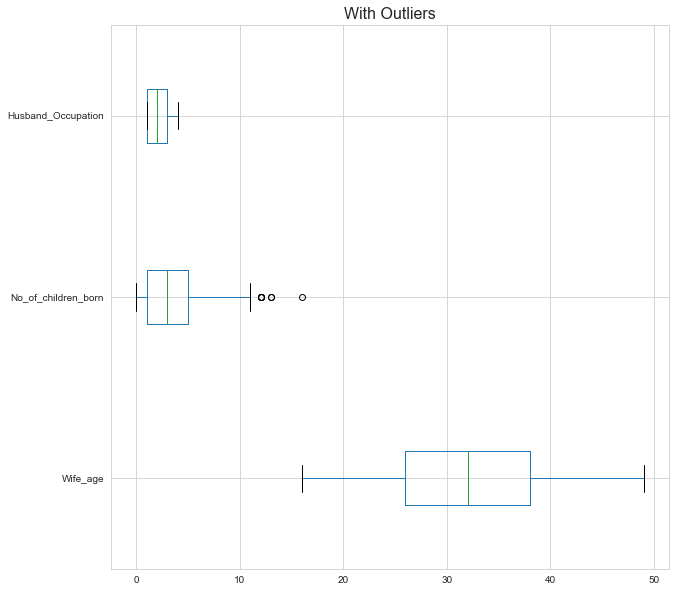

In [181]:
cont=data.dtypes[(data.dtypes!='object')].index
plt.figure(figsize=(10,10))
data[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [182]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print(feature)
        print(data[feature].value_counts())
        print('\n')

Wife_ education
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64


Husband_education
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64


Wife_religion
Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64


Wife_Working
No     1043
Yes     350
Name: Wife_Working, dtype: int64


Standard_of_living_index
Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64


Media_exposure 
Exposed        1284
Not-Exposed     109
Name: Media_exposure , dtype: int64


Contraceptive_method_used
Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64




In [183]:
data.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

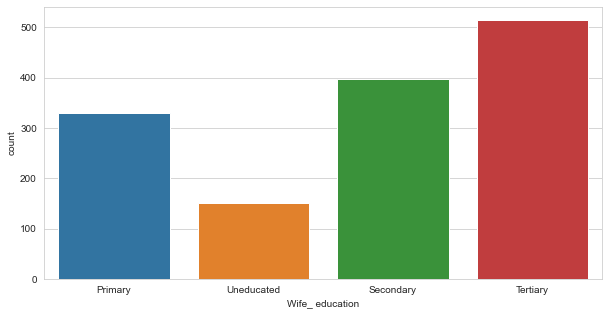

In [184]:
plt.figure(figsize=(10,5))
sns.countplot(data = data,x = 'Wife_ education' );

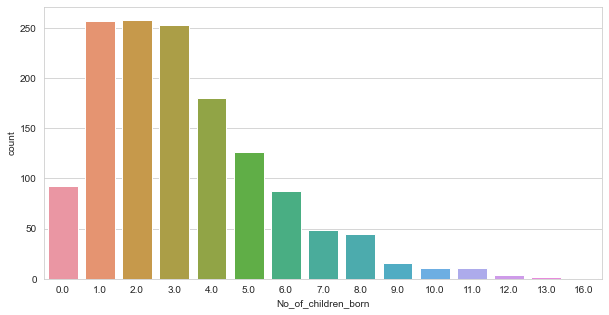

In [185]:
plt.figure(figsize=(10,5))
sns.countplot(data = data,x = 'No_of_children_born' );

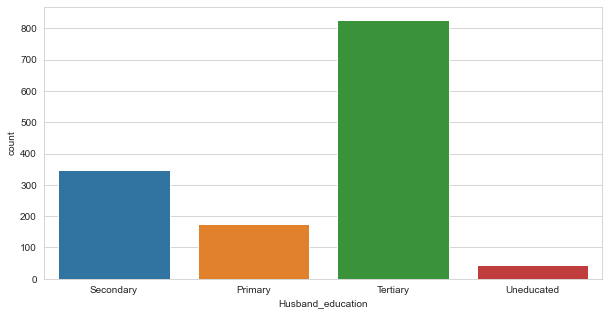

In [186]:
plt.figure(figsize=(10,5))
sns.countplot(data = data,x = 'Husband_education');

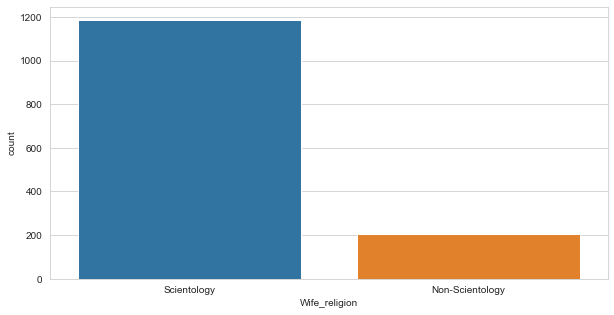

In [187]:
plt.figure(figsize=(10,5))
sns.countplot(data = data,x = 'Wife_religion');

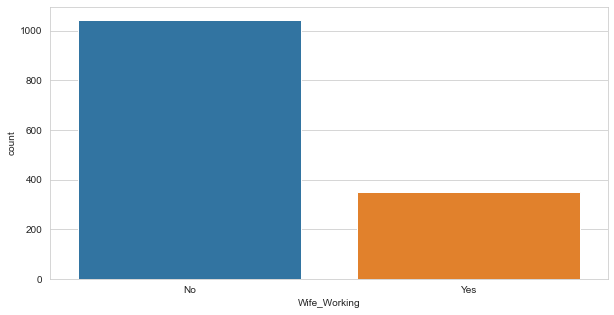

In [188]:
plt.figure(figsize=(10,5))
sns.countplot(data = data,x = 'Wife_Working');

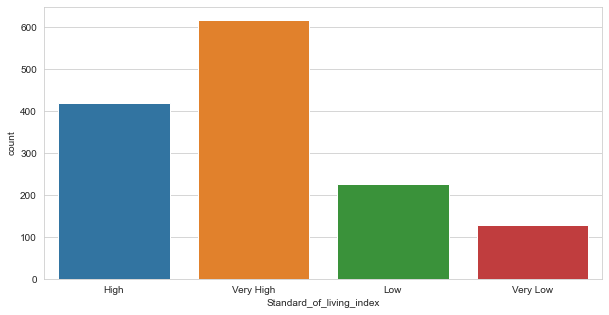

In [189]:
plt.figure(figsize=(10,5))
sns.countplot(data = data,x = 'Standard_of_living_index');

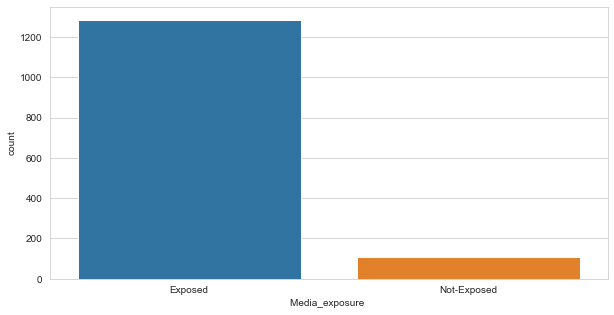

In [190]:
plt.figure(figsize=(10,5))
sns.countplot(data = data,x ='Media_exposure ');

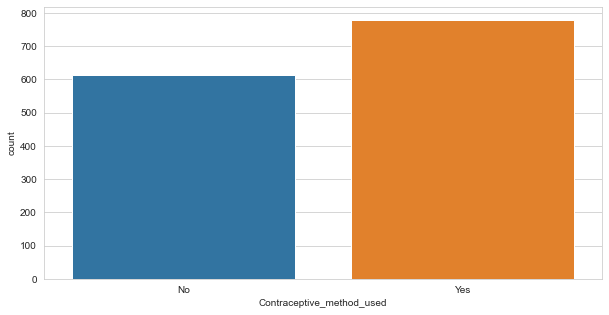

In [191]:
plt.figure(figsize=(10,5))
sns.countplot(data = data,x ='Contraceptive_method_used');

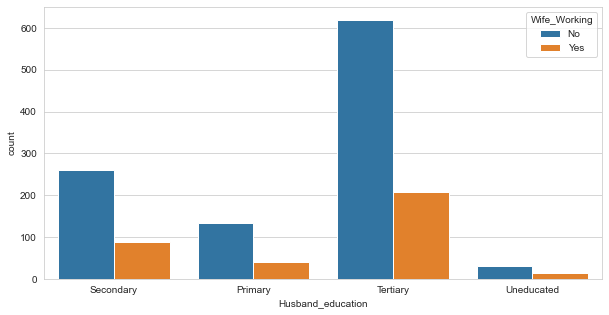

In [192]:
plt.figure(figsize=(10,5))
sns.countplot(data = data, x = 'Husband_education', hue = 'Wife_Working');

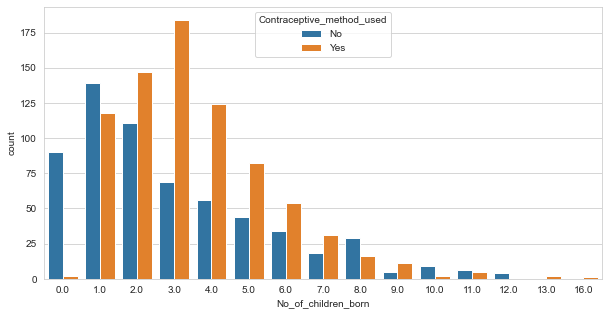

In [193]:
plt.figure(figsize=(10,5))
sns.countplot(data = data, x = 'No_of_children_born', hue = 'Contraceptive_method_used');

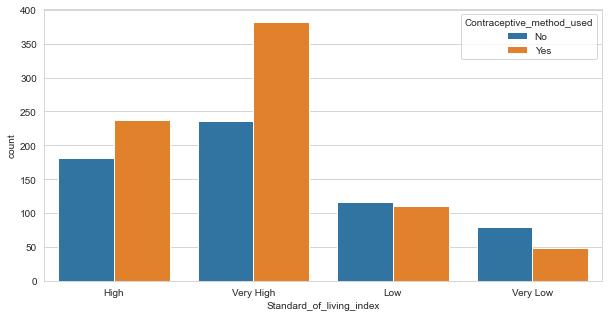

In [194]:
plt.figure(figsize=(10,5))
sns.countplot(data = data, x = 'Standard_of_living_index', hue = 'Contraceptive_method_used');

<AxesSubplot:xlabel='Wife_ education', ylabel='count'>

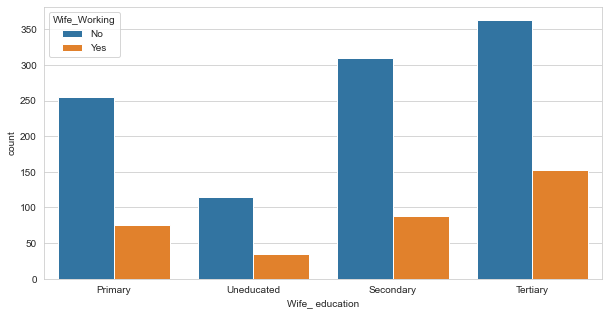

In [195]:
plt.figure(figsize=(10,5))
sns.countplot(data = data,x = 'Wife_ education', hue = 'Wife_Working' )

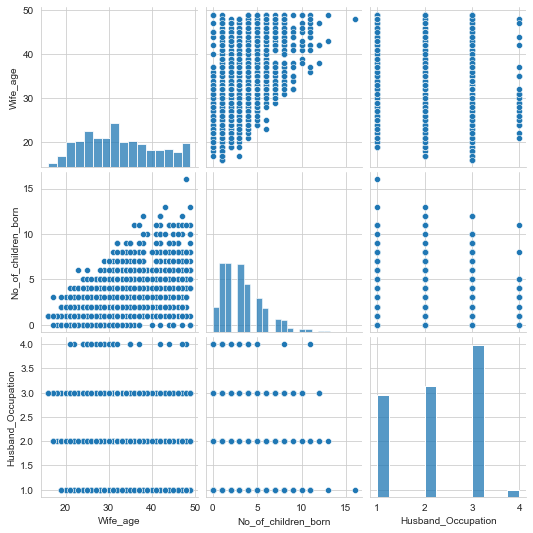

In [196]:
sns.pairplot(data);

In [197]:
data.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

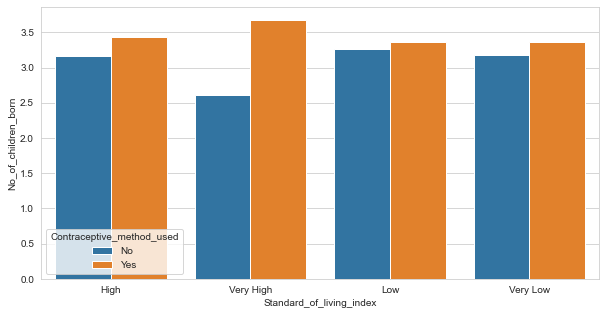

In [198]:
plt.figure(figsize=(10,5))
sns.barplot(data = data, x = 'Standard_of_living_index', hue = 'Contraceptive_method_used', y ='No_of_children_born', ci = False );

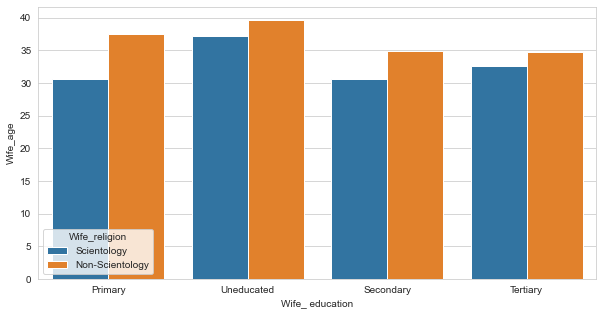

In [199]:
plt.figure(figsize=(10,5))
sns.barplot(data = data, x = 'Wife_ education', hue = 'Wife_religion', y ='Wife_age', ci = False );

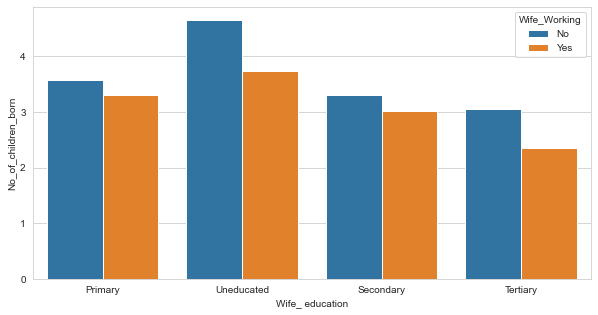

In [200]:
plt.figure(figsize=(10,5))
sns.barplot(data = data,x = 'Wife_ education', hue = 'Wife_Working', y ='No_of_children_born', ci = False );

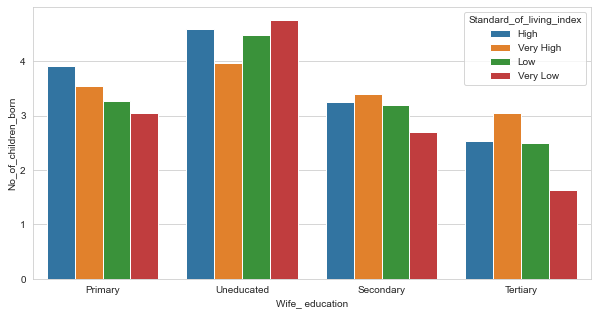

In [201]:
plt.figure(figsize=(10,5))
sns.barplot(data = data,x = 'Wife_ education', hue = 'Standard_of_living_index', y ='No_of_children_born', ci = False );

# Converting all objects to categorical codes¶

In [202]:
data['Wife_ education']=np.where(data['Wife_ education'] =='Uneducated', '1', data['Wife_ education'])
data['Wife_ education']=np.where(data['Wife_ education'] =='Primary', '2', data['Wife_ education'])
data['Wife_ education']=np.where(data['Wife_ education'] =='Secondary', '3', data['Wife_ education'])
data['Wife_ education']=np.where(data['Wife_ education'] =='Tertiary', '4', data['Wife_ education'])

In [203]:
data['Husband_education']=np.where(data['Husband_education'] =='Uneducated', '1', data['Husband_education'])
data['Husband_education']=np.where(data['Husband_education'] =='Primary', '2', data['Husband_education'])
data['Husband_education']=np.where(data['Husband_education'] =='Secondary', '3', data['Husband_education'])
data['Husband_education']=np.where(data['Husband_education'] =='Tertiary', '4', data['Husband_education'])

In [204]:
data['Standard_of_living_index']=np.where(data['Standard_of_living_index'] == 'Very Low', '1', data['Standard_of_living_index'])
data['Standard_of_living_index']=np.where(data['Standard_of_living_index'] == 'Low', '2', data['Standard_of_living_index'])
data['Standard_of_living_index']=np.where(data['Standard_of_living_index'] == 'High', '3', data['Standard_of_living_index'])
data['Standard_of_living_index']=np.where(data['Standard_of_living_index'] == 'Very High', '4', data['Standard_of_living_index'])

In [205]:
data['Wife_ education'] = data['Wife_ education'].astype('int64')
data['Husband_education'] = data['Husband_education'].astype('int64')
data['Standard_of_living_index'] = data['Standard_of_living_index'].astype('int64')


In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 152.0+ KB


In [207]:
data_dummy = pd.get_dummies(data,drop_first=True)
data_dummy.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0      24.0                2                  3                  3.0   
1      45.0                1                  3                 10.0   
2      43.0                2                  3                  7.0   
3      42.0                3                  2                  9.0   
4      36.0                3                  3                  8.0   

   Husband_Occupation  Standard_of_living_index  Wife_religion_Scientology  \
0                   2                         3                          1   
1                   3                         4                          1   
2                   3                         4                          1   
3                   3                         3                          1   
4                   3                         2                          1   

   Wife_Working_Yes  Media_exposure _Not-Exposed  \
0                 0                            0   
1                 0                            0   
2                 0                            0   
3                 0                            0   
4                 0                            0   

   Contraceptive_method_used_Yes  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0

In [208]:
# Copy all the predictor variables into X dataframe
X = data_dummy.drop('Contraceptive_method_used_Yes', axis=1)

# Copy target into the y dataframe. 
y = data_dummy['Contraceptive_method_used_Yes']

In [209]:
X.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0      24.0                2                  3                  3.0   
1      45.0                1                  3                 10.0   
2      43.0                2                  3                  7.0   
3      42.0                3                  2                  9.0   
4      36.0                3                  3                  8.0   

   Husband_Occupation  Standard_of_living_index  Wife_religion_Scientology  \
0                   2                         3                          1   
1                   3                         4                          1   
2                   3                         4                          1   
3                   3                         3                          1   
4                   3                         2                          1   

   Wife_Working_Yes  Media_exposure _Not-Exposed  
0                 0                            0  
1                 0                            0  
2                 0                            0  
3                 0                            0  
4                 0                            0

In [210]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Contraceptive_method_used_Yes, dtype: uint8

In [211]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=data_dummy['Contraceptive_method_used_Yes'])

In [212]:
y_train.value_counts(1)

1    0.558974
0    0.441026
Name: Contraceptive_method_used_Yes, dtype: float64

In [213]:
y_test.value_counts(1)

1    0.559809
0    0.440191
Name: Contraceptive_method_used_Yes, dtype: float64

# Logistic Regression Model

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [215]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter = 10000, penalty='none', verbose=True)
model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(max_iter=10000, penalty='none', solver='newton-cg',
                   verbose=True)

In [216]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [217]:
ytest_predict

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,

In [218]:
ytest_predict_prob = model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.282220  0.717780
1  0.614046  0.385954
2  0.335348  0.664652
3  0.297914  0.702086
4  0.244837  0.755163

In [219]:
# Accuracy - Training Data
model.score(X_train,y_train)

0.6748717948717948

AUC:0.719


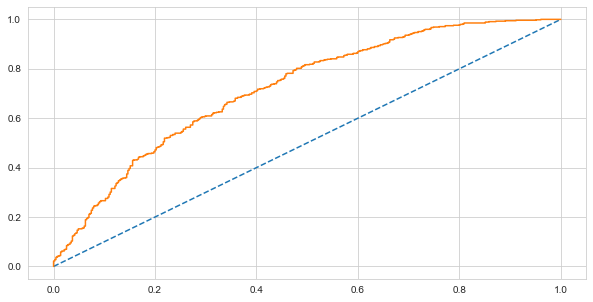

In [220]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
plt.figure(figsize=(10,5))
auc = roc_auc_score(y_train, probs)
print('AUC:%.3f' %auc)
# calculate AUC
train_fpr,train_tpr,train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
# calculate roc curve

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [221]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6483253588516746

AUC: 0.719


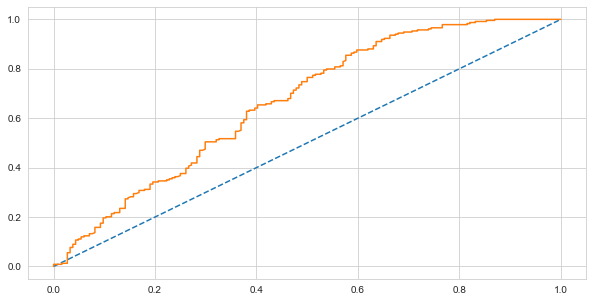

In [222]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
plt.figure(figsize=(10,5))
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [223]:
confusion_matrix(y_train, ytrain_predict)

array([[227, 203],
       [114, 431]])

/Users/yareshvijayasundaram/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


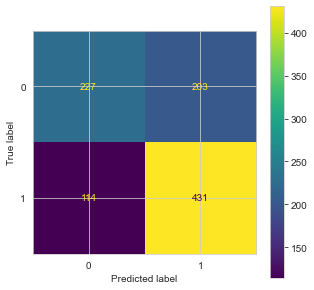

In [224]:
fig, ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(model,X_train,y_train,ax=ax)

In [225]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59       430
           1       0.68      0.79      0.73       545

    accuracy                           0.67       975
   macro avg       0.67      0.66      0.66       975
weighted avg       0.67      0.67      0.67       975



In [226]:
confusion_matrix(y_test, ytest_predict)

array([[ 86,  98],
       [ 49, 185]])

/Users/yareshvijayasundaram/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


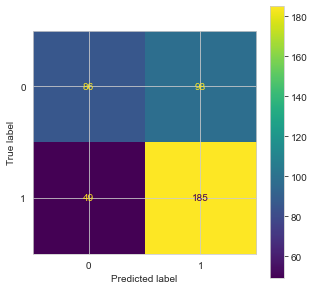

In [227]:
fig, ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(model,X_test,y_test,ax=ax);

In [228]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.47      0.54       184
           1       0.65      0.79      0.72       234

    accuracy                           0.65       418
   macro avg       0.65      0.63      0.63       418
weighted avg       0.65      0.65      0.64       418



In [229]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [230]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model = clf.fit(X_train,y_train)

In [231]:
#intercept value
clf.intercept_

array([-0.81058333])

In [232]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.0731937 ,  0.51534689,  0.03615321,  0.31062619,  0.13736477,
         0.31957476, -0.44996625, -0.17085182, -0.34267426]])

In [233]:
X_train.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Husband_Occupation', 'Standard_of_living_index',
       'Wife_religion_Scientology', 'Wife_Working_Yes',
       'Media_exposure _Not-Exposed'],
      dtype='object')

In [234]:
a= clf.coef_
np.round(a,2)     # rounded up coefficients 

array([[-0.07,  0.52,  0.04,  0.31,  0.14,  0.32, -0.45, -0.17, -0.34]])

In [235]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [236]:
pred_class_train

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,

In [237]:
pred_class_test

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,

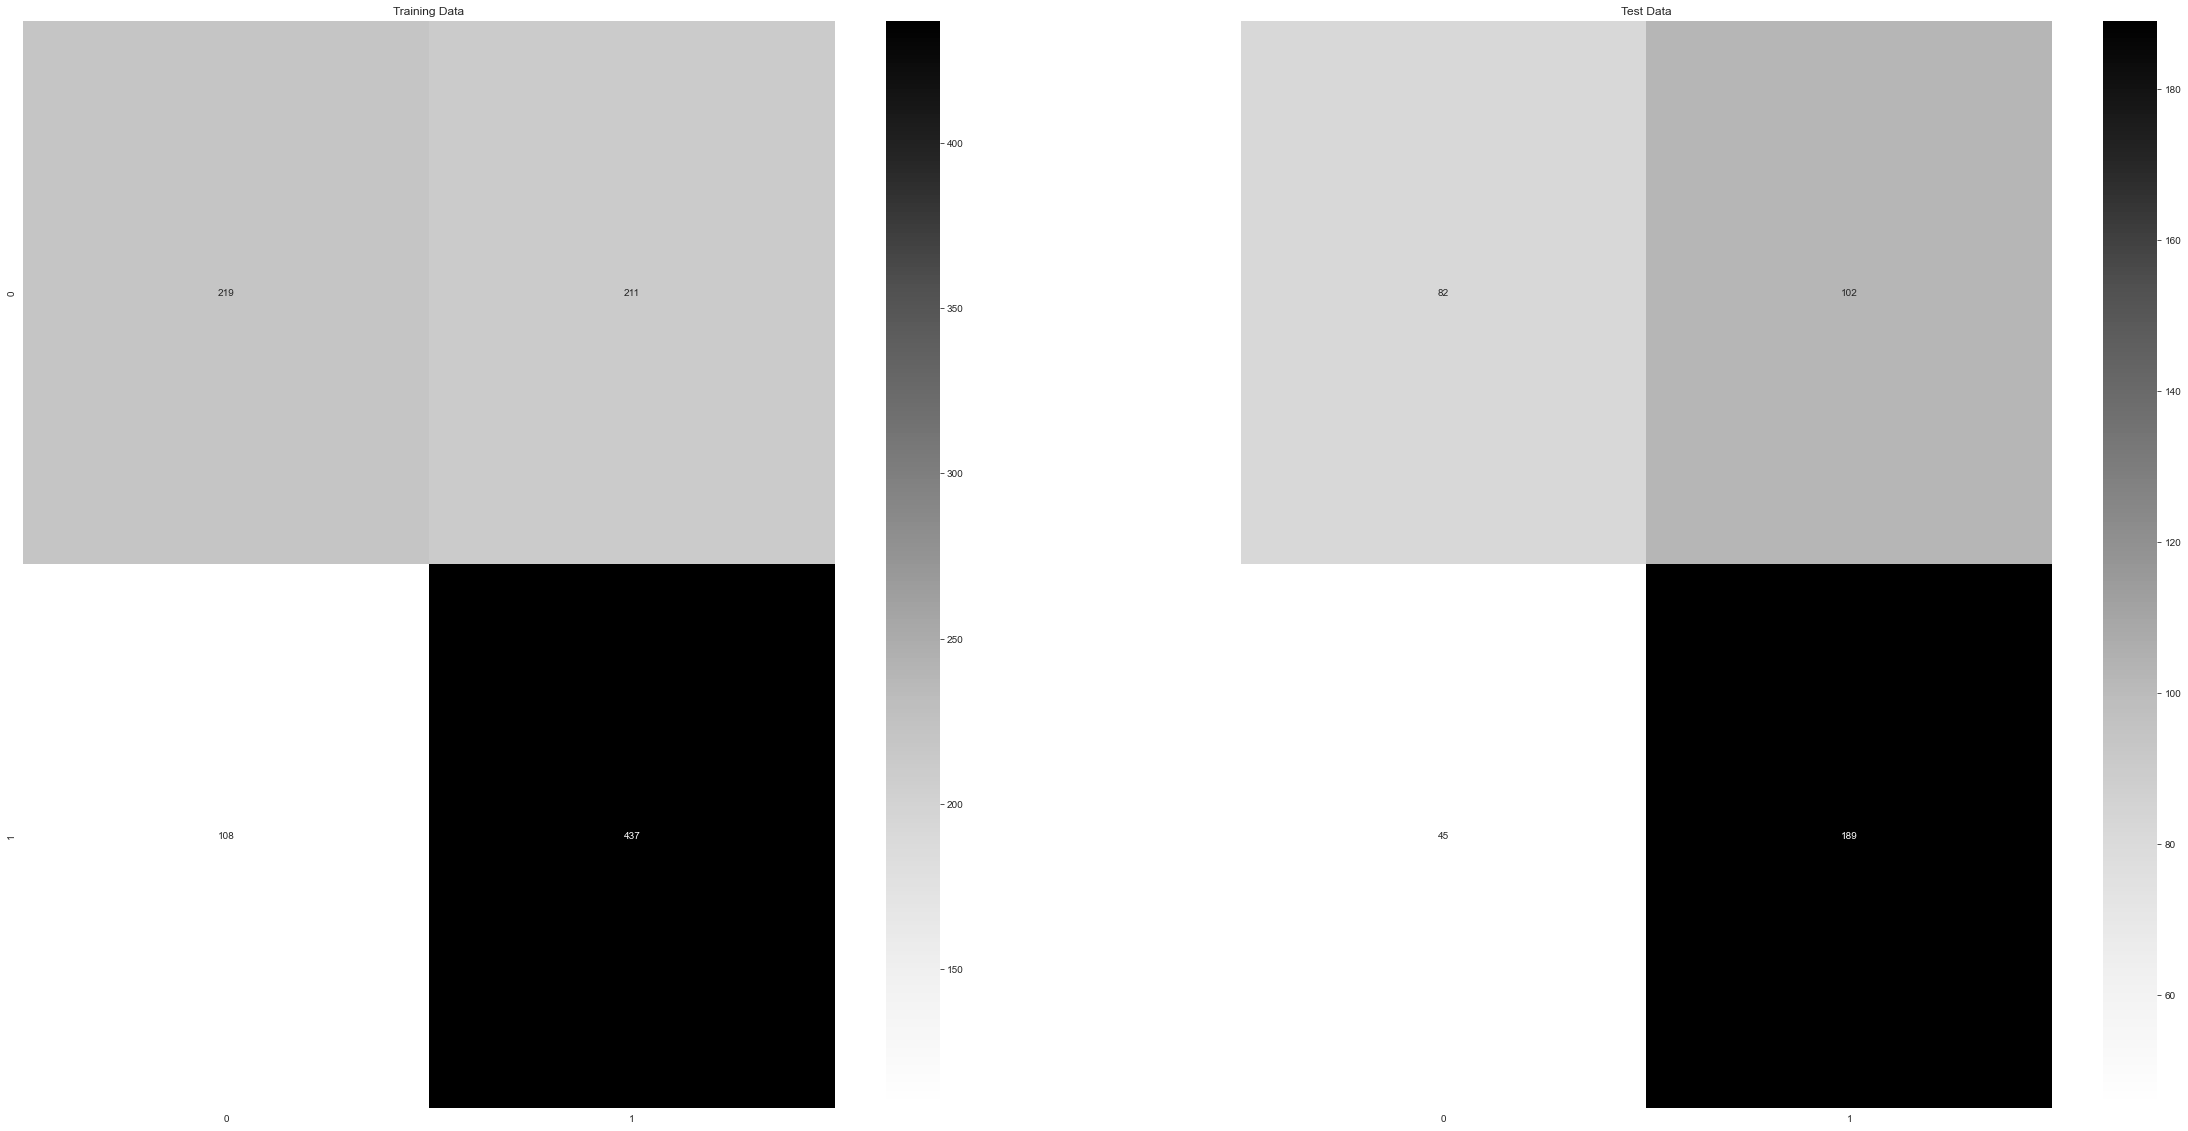

In [238]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [239]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.51      0.58       430
           1       0.67      0.80      0.73       545

    accuracy                           0.67       975
   macro avg       0.67      0.66      0.66       975
weighted avg       0.67      0.67      0.66       975
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.45      0.53       184
           1       0.65      0.81      0.72       234

    accuracy                           0.65       418
   macro avg       0.65      0.63      0.62       418
weighted avg       0.65      0.65      0.64       418
 



In [240]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [241]:
pred_prob_train[:,1]

array([0.31104526, 0.81605288, 0.81145854, 0.61038622, 0.27497712,
       0.53110529, 0.51958552, 0.31011183, 0.84489762, 0.69886487,
       0.62110095, 0.75993635, 0.58164803, 0.85783379, 0.86771277,
       0.7683191 , 0.76502377, 0.45885274, 0.42544993, 0.73156472,
       0.6546163 , 0.64913157, 0.70522665, 0.16127317, 0.51998346,
       0.43991307, 0.64354993, 0.37835165, 0.31926129, 0.59946286,
       0.34794658, 0.50712152, 0.32810089, 0.69319486, 0.53821785,
       0.73574878, 0.27850539, 0.51433256, 0.53187991, 0.70223458,
       0.70083757, 0.45209427, 0.204739  , 0.52627508, 0.30182214,
       0.42403161, 0.72162973, 0.35219313, 0.56956079, 0.75670027,
       0.22155799, 0.66493232, 0.78330947, 0.34216534, 0.59247395,
       0.6359786 , 0.66778053, 0.46564687, 0.35716972, 0.7046996 ,
       0.76320619, 0.50100458, 0.26954279, 0.57769386, 0.503061  ,
       0.41907654, 0.59342643, 0.20014581, 0.2878288 , 0.25574749,
       0.52437349, 0.49759556, 0.47363569, 0.60599382, 0.64230

AUC for the Training Data: 0.719
AUC for the Test Data: 0.664


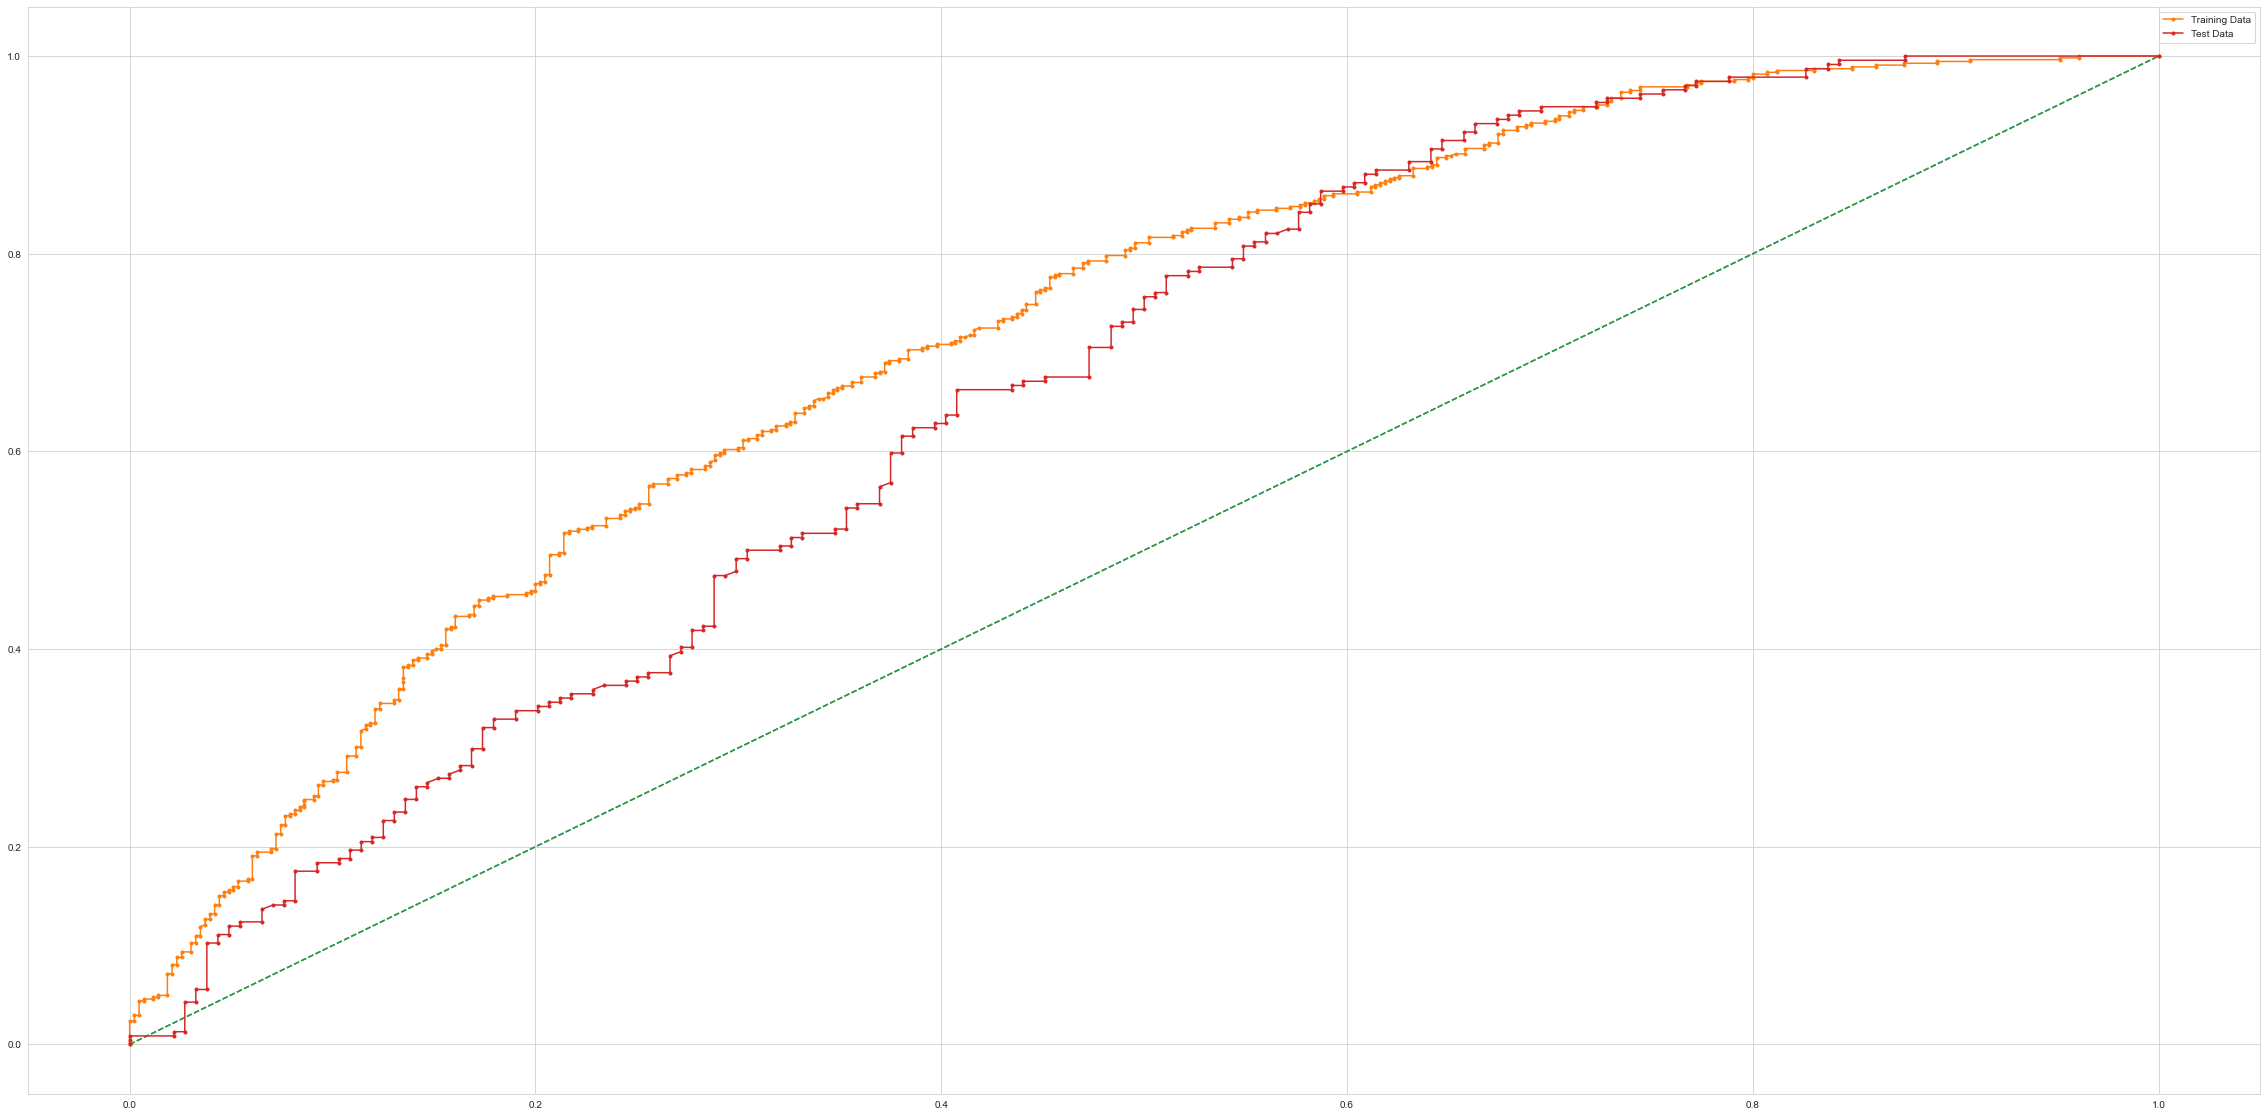

In [242]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [243]:
from sklearn.tree import DecisionTreeClassifier

In [244]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier()

In [245]:
# Fit the model
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [246]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [247]:

dt_model.feature_importances_

array([0.31965464, 0.09513639, 0.08264367, 0.25429052, 0.06990918,
       0.08506288, 0.03646784, 0.04613901, 0.01069587])

In [248]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                                  Imp
Wife_age                     0.319655
No_of_children_born          0.254291
Wife_ education              0.095136
Standard_of_living_index     0.085063
Husband_education            0.082644
Husband_Occupation           0.069909
Wife_Working_Yes             0.046139
Wife_religion_Scientology    0.036468
Media_exposure _Not-Exposed  0.010696


In [249]:
y_predict = dt_model.predict(X_test)

In [250]:
y_predict.shape

(418,)

In [251]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth =8,min_samples_leaf=100,min_samples_split=100,random_state=1)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=100, min_samples_split=100,
                       random_state=1)

In [252]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [253]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                  Imp
Wife_age                     0.350811
No_of_children_born          0.342979
Wife_ education              0.243889
Standard_of_living_index     0.062322
Husband_education            0.000000
Husband_Occupation           0.000000
Wife_religion_Scientology    0.000000
Wife_Working_Yes             0.000000
Media_exposure _Not-Exposed  0.000000


In [254]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [255]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (975,)
ytest_predict (418,)


In [256]:
ytest_predict

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,

In [257]:
ytest_predict_prob = reg_dt_model.predict_proba(X_test)

In [258]:
 pd.DataFrame(ytest_predict_prob).head()
    

0         1
0  0.514286  0.485714
1  0.514286  0.485714
2  0.257426  0.742574
3  0.234848  0.765152
4  0.234848  0.765152

In [259]:
import matplotlib.pyplot as plt

AUC: 0.747


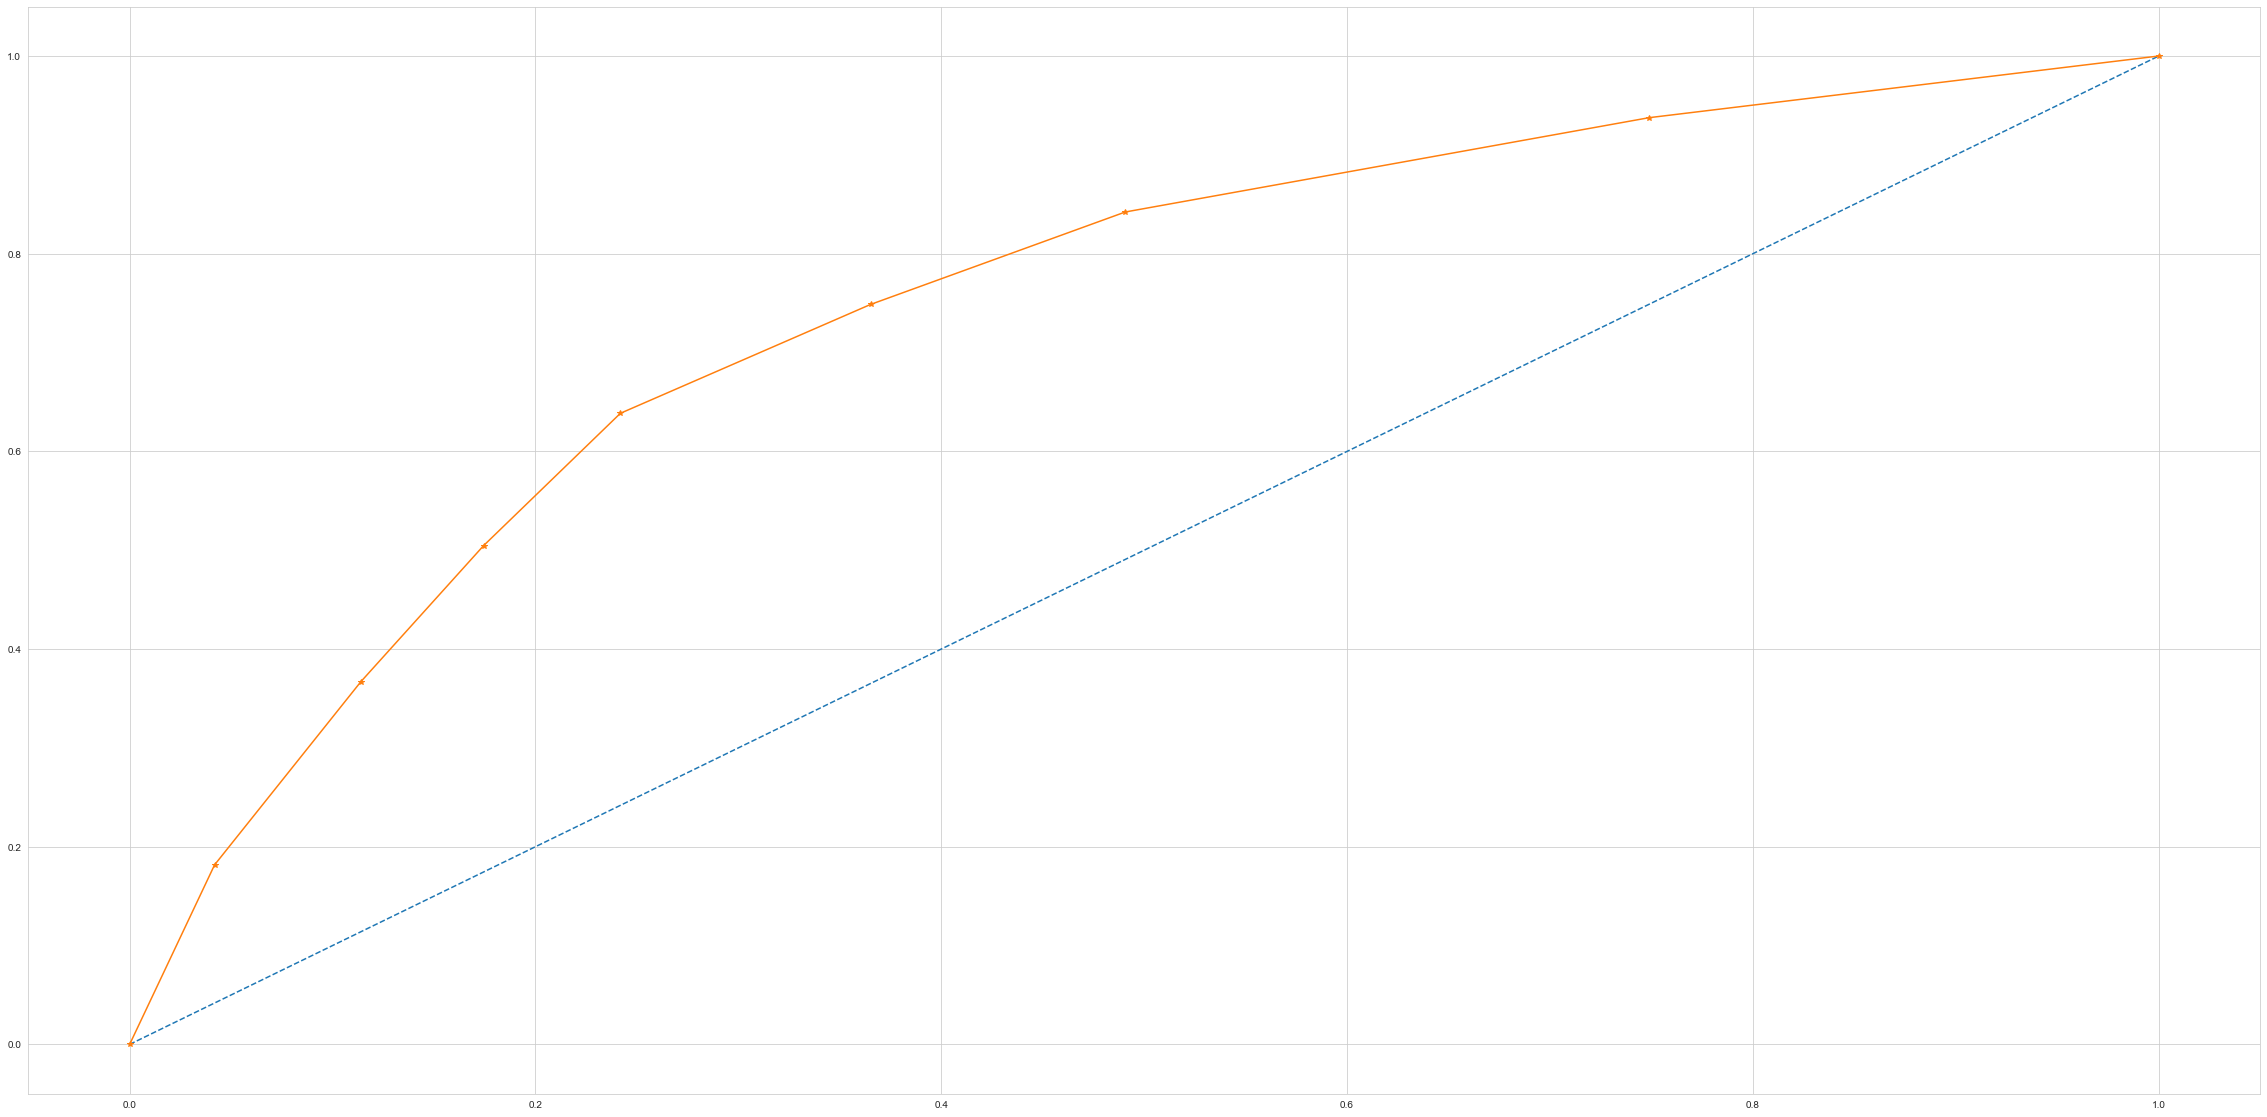

In [260]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train,probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
# plot the roc curve for the model
plt.plot(fpr,tpr,marker='*')
# show the plot
plt.show()

AUC: 0.704


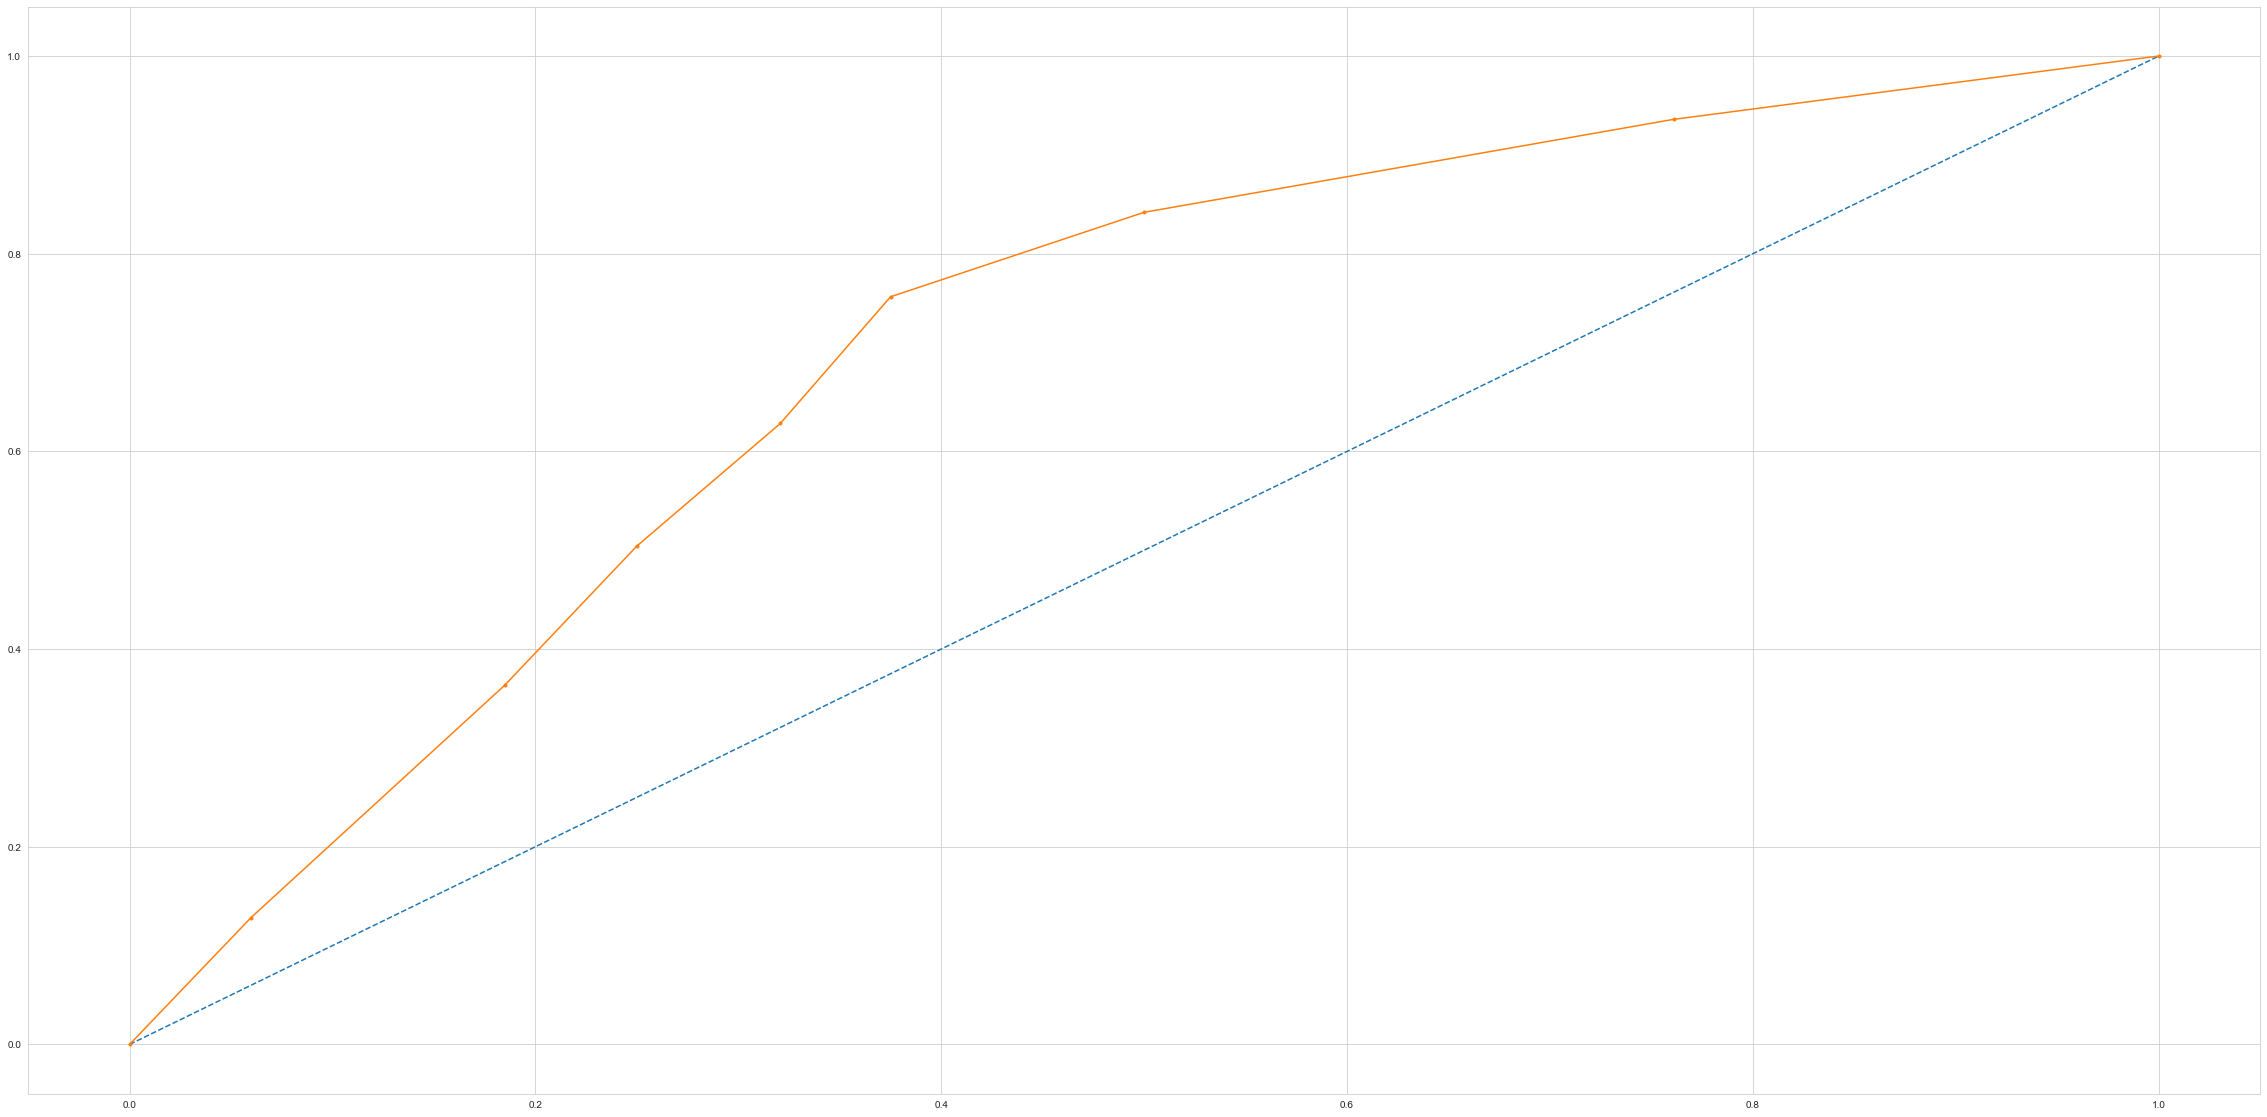

In [261]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [262]:
from sklearn.metrics import classification_report,confusion_matrix

In [263]:
confusion_matrix(y_train, ytrain_predict)

array([[273, 157],
       [137, 408]])

In [264]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.6984615384615385

In [265]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65       430
           1       0.72      0.75      0.74       545

    accuracy                           0.70       975
   macro avg       0.69      0.69      0.69       975
weighted avg       0.70      0.70      0.70       975



In [266]:
confusion_matrix(y_test, ytest_predict)

array([[115,  69],
       [ 57, 177]])

In [267]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.6985645933014354

In [268]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.67      0.62      0.65       184
           1       0.72      0.76      0.74       234

    accuracy                           0.70       418
   macro avg       0.69      0.69      0.69       418
weighted avg       0.70      0.70      0.70       418

